In [1]:
# remove stupid fucking warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import IPython.display as ipd
import math
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [2]:
DATASET_PATH = "Training-Audio"
TRAIN_JSON_PATH = "Json\\data.json"
SAMPLE_RATE = 22050
#PREDICT_DATASET_PATH = "Prediction-Audio\\abcdefg.wav"
PREDICT_JSON_PATH = "Json\\predict.json"

,:


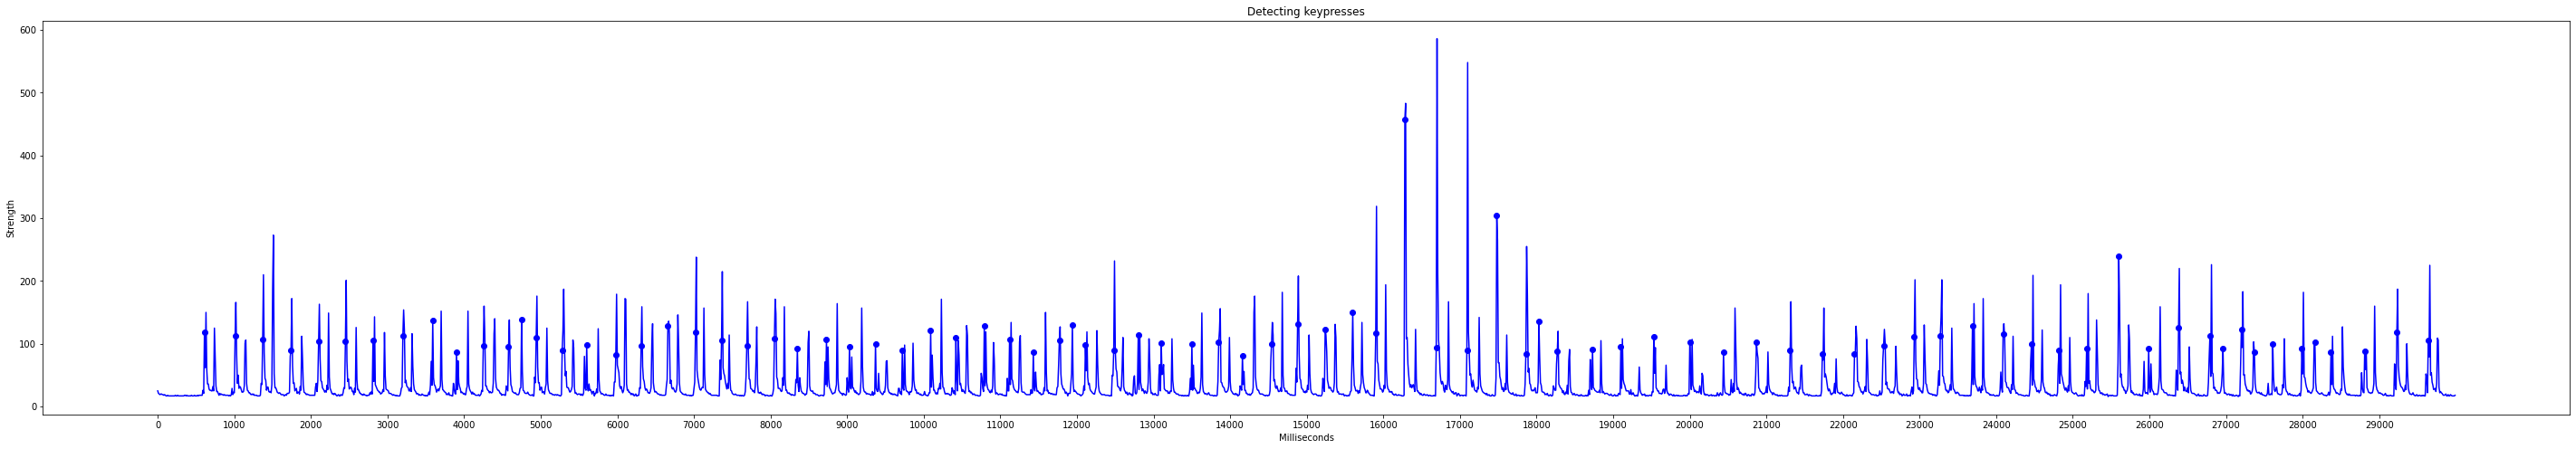

.:


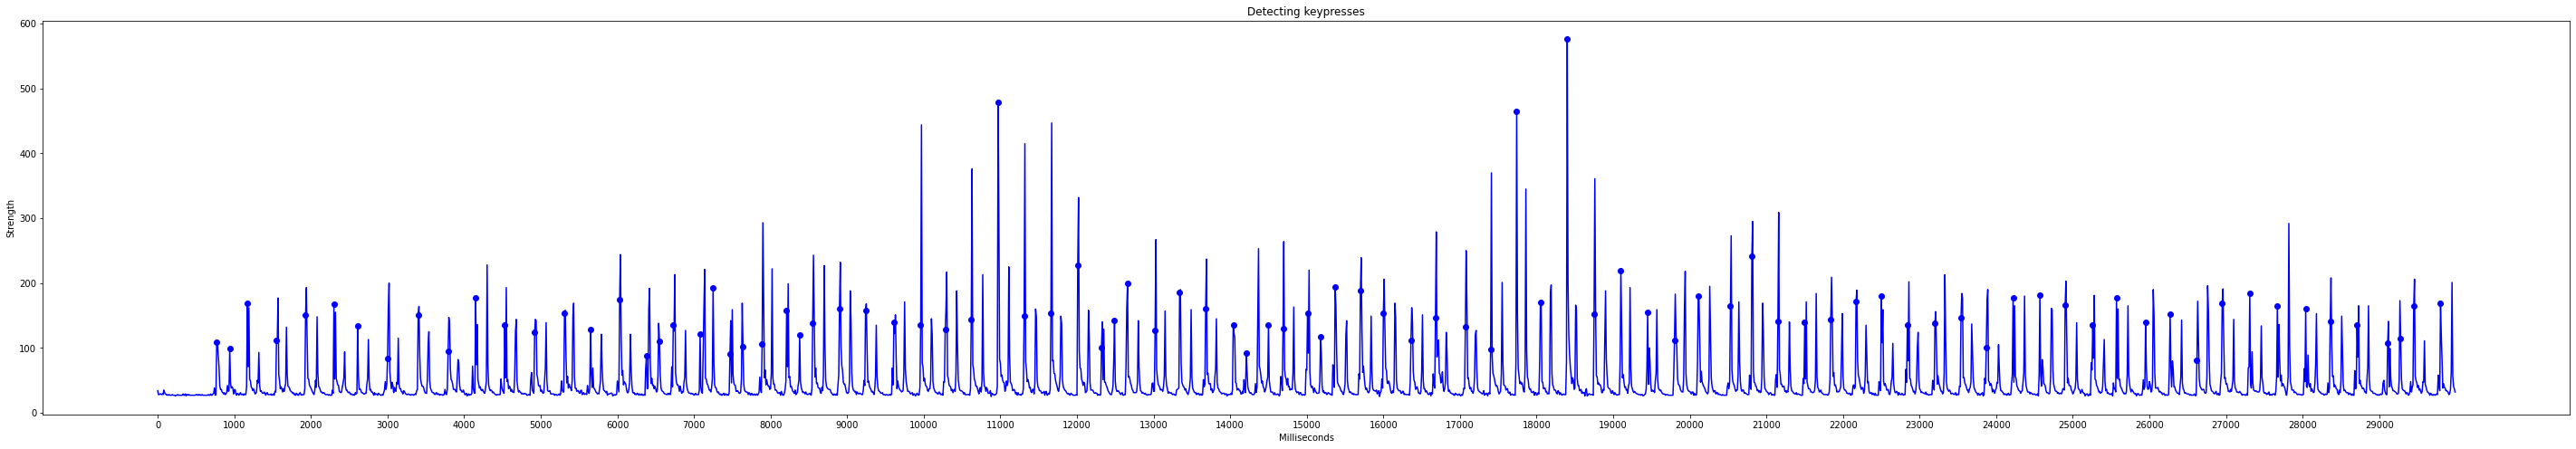

0:


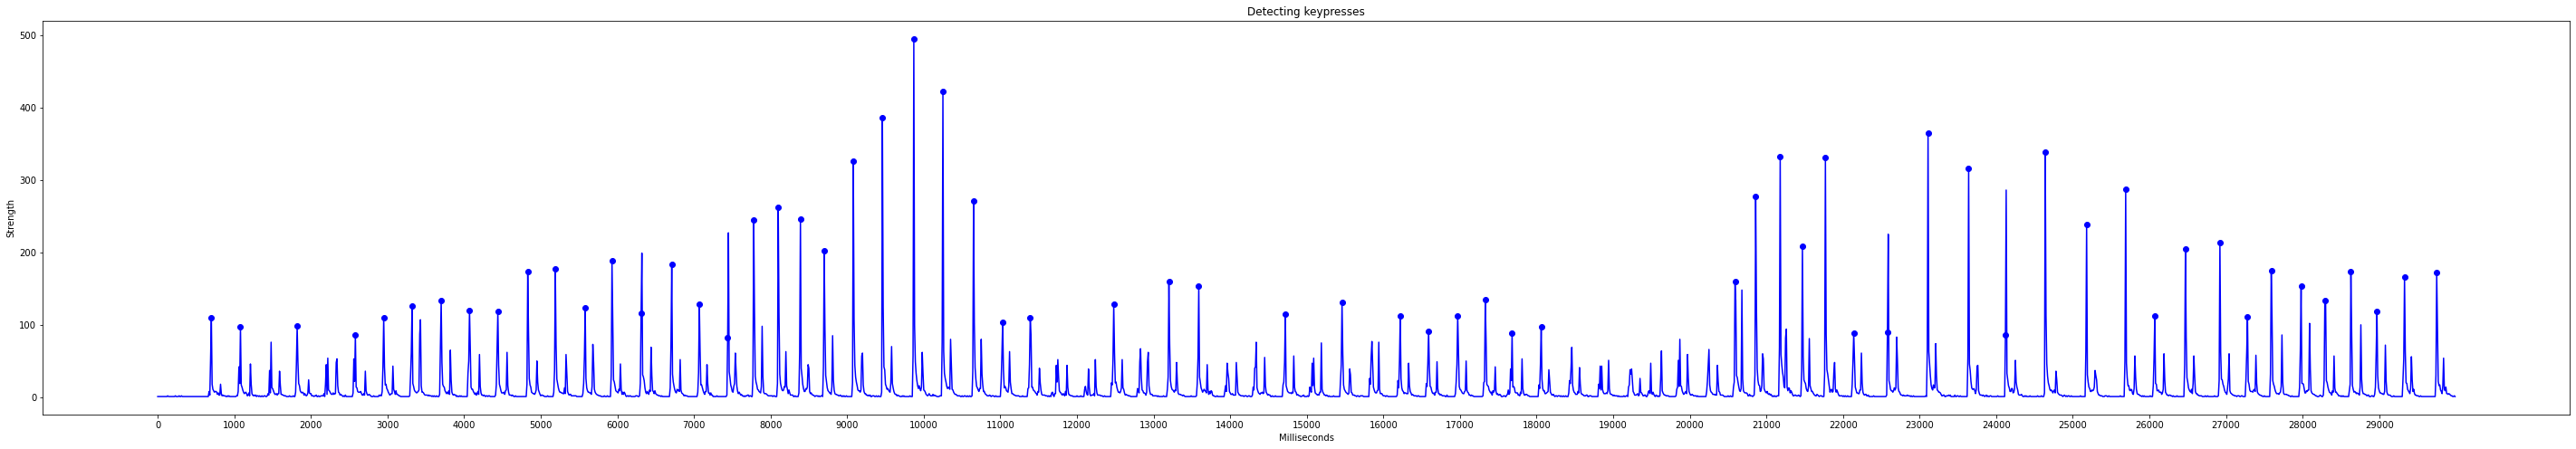

1:


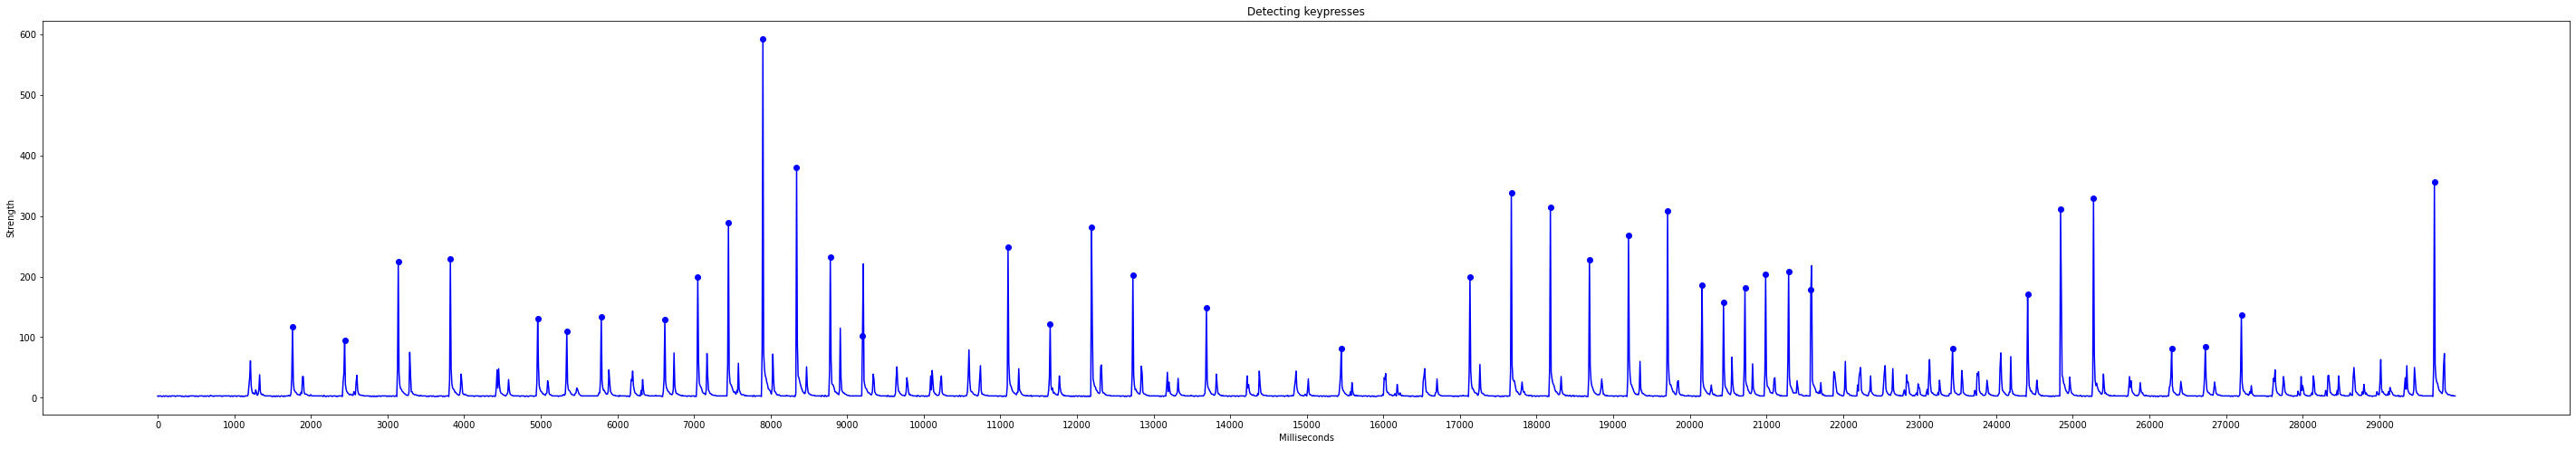

2:


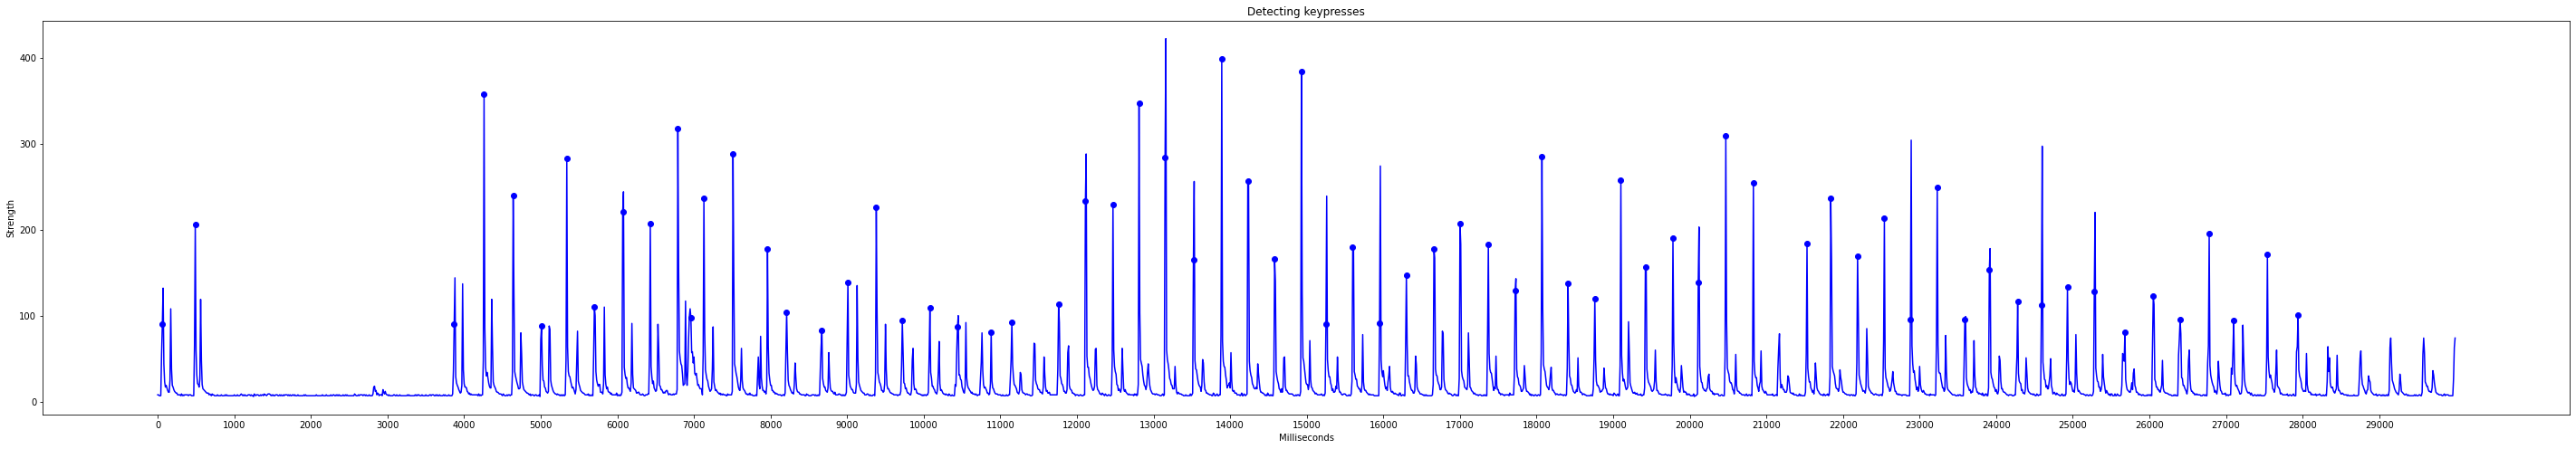

3:


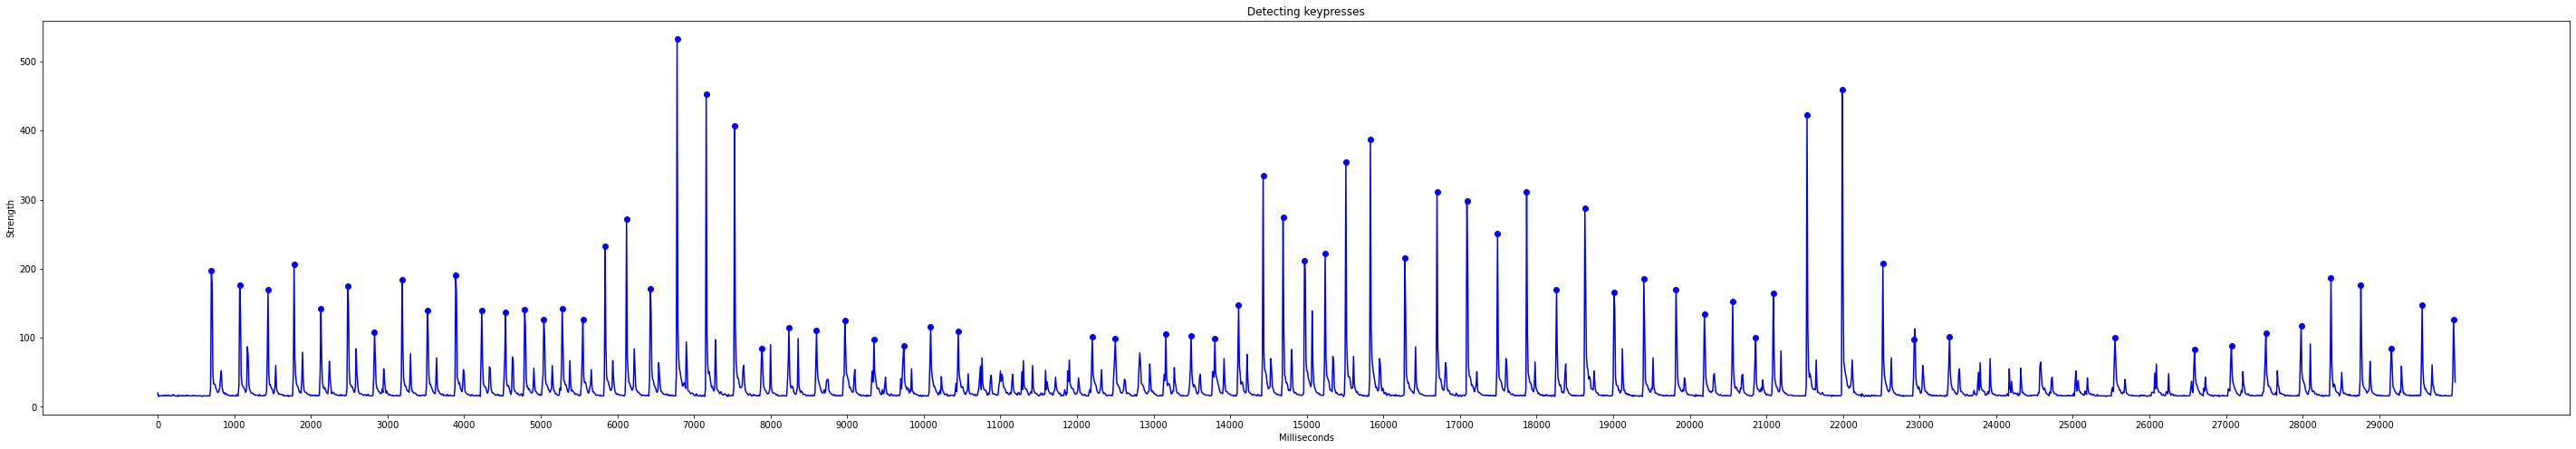

4:


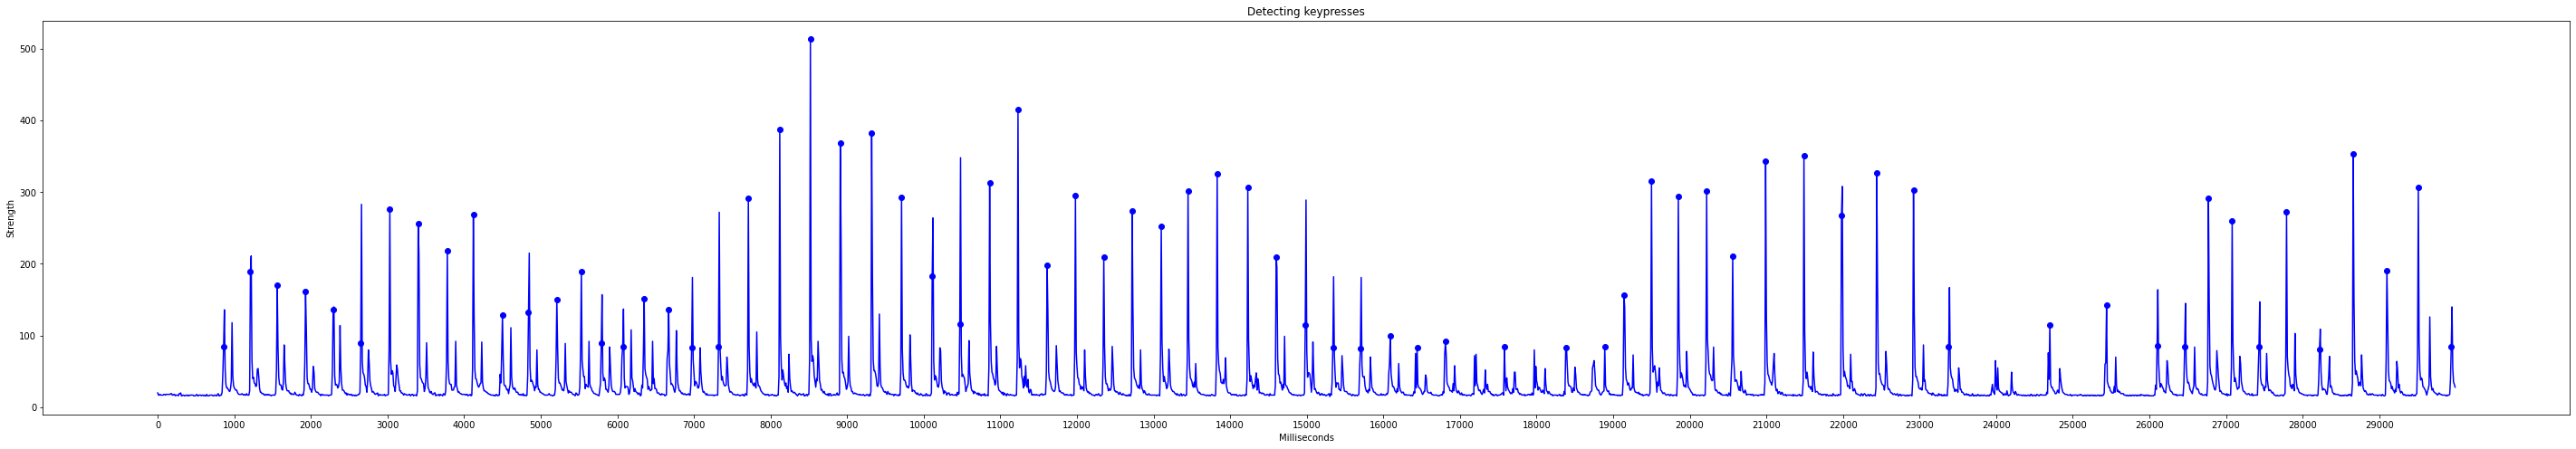

5:


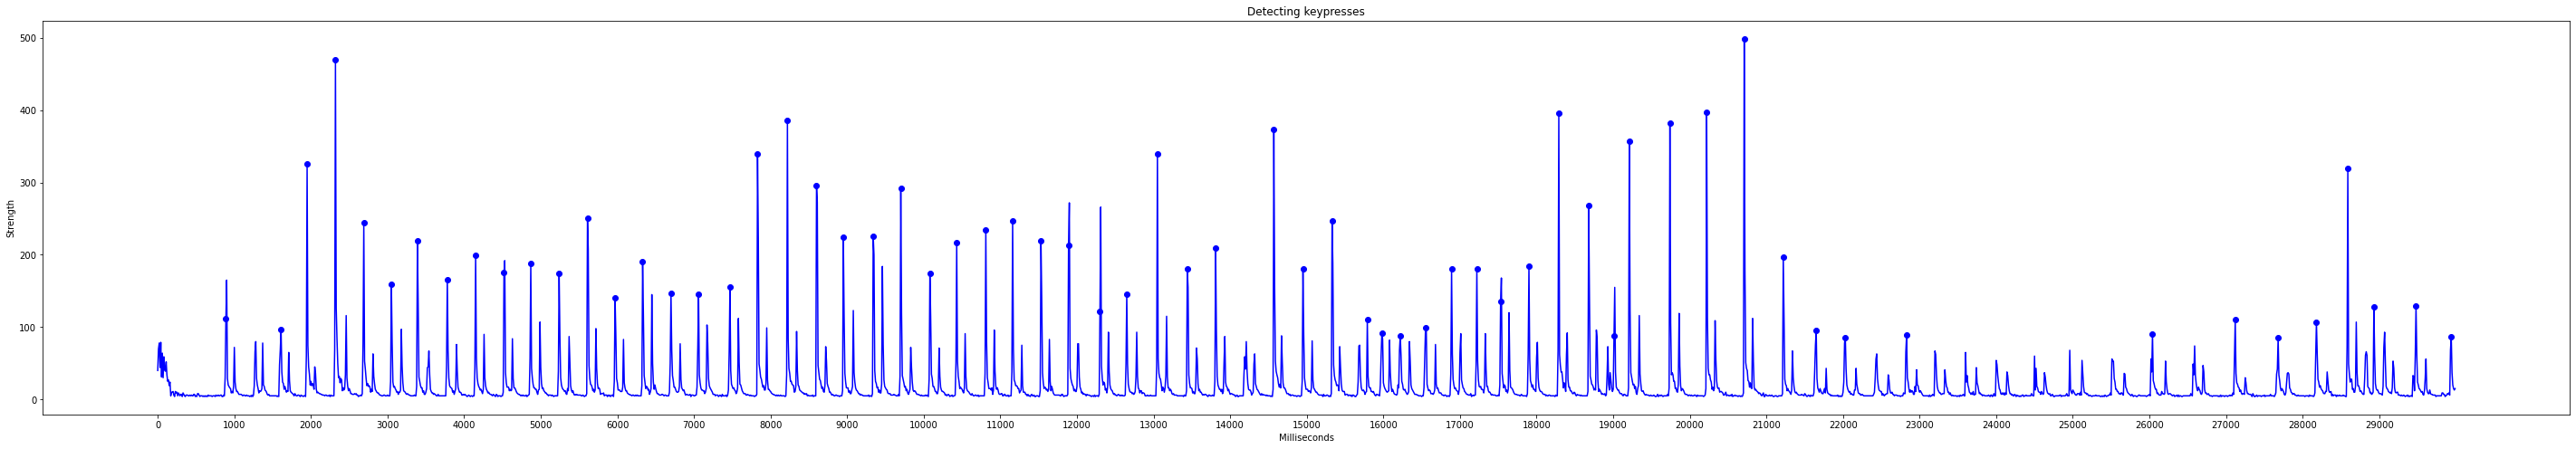

6:


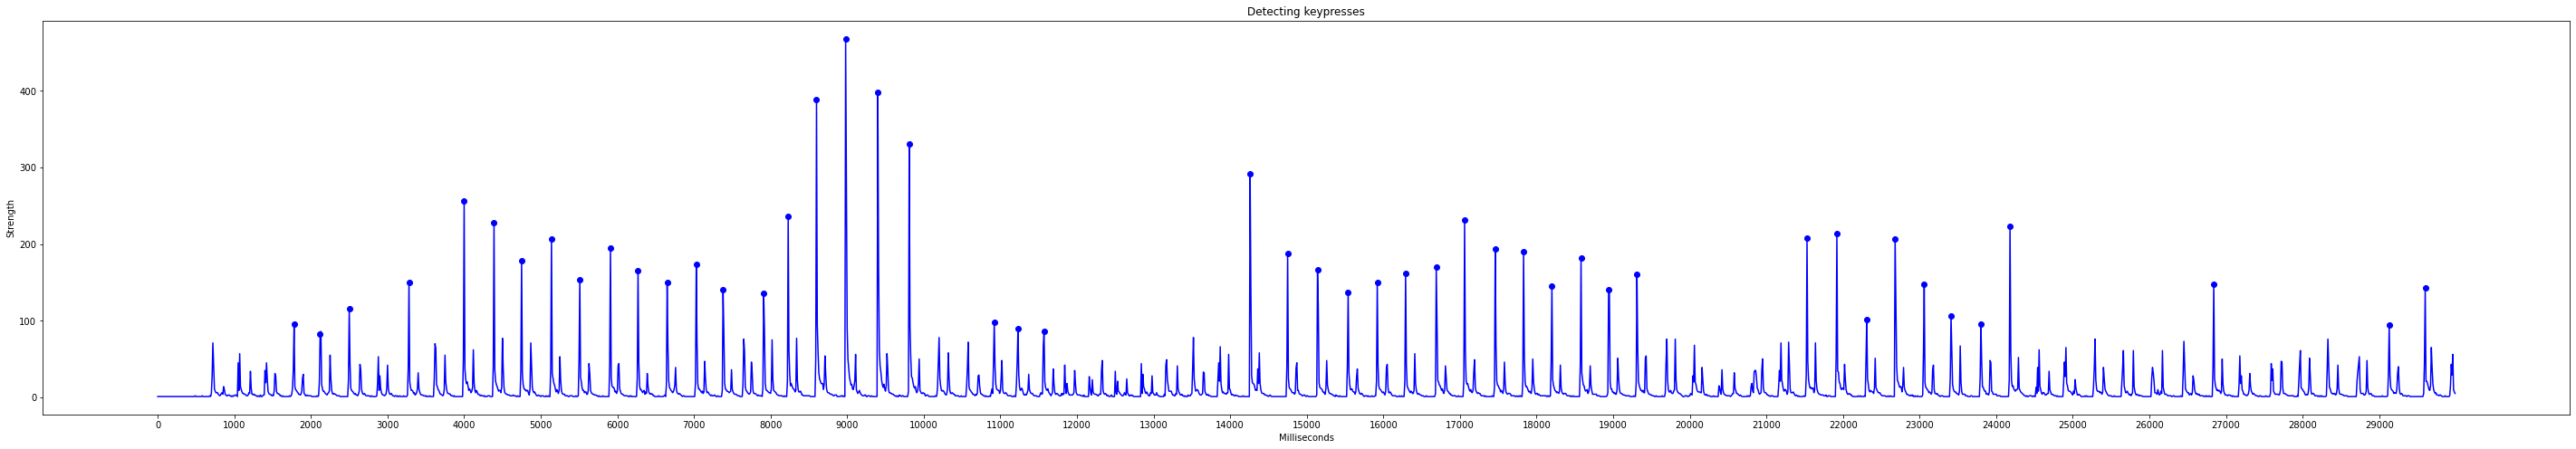

7:


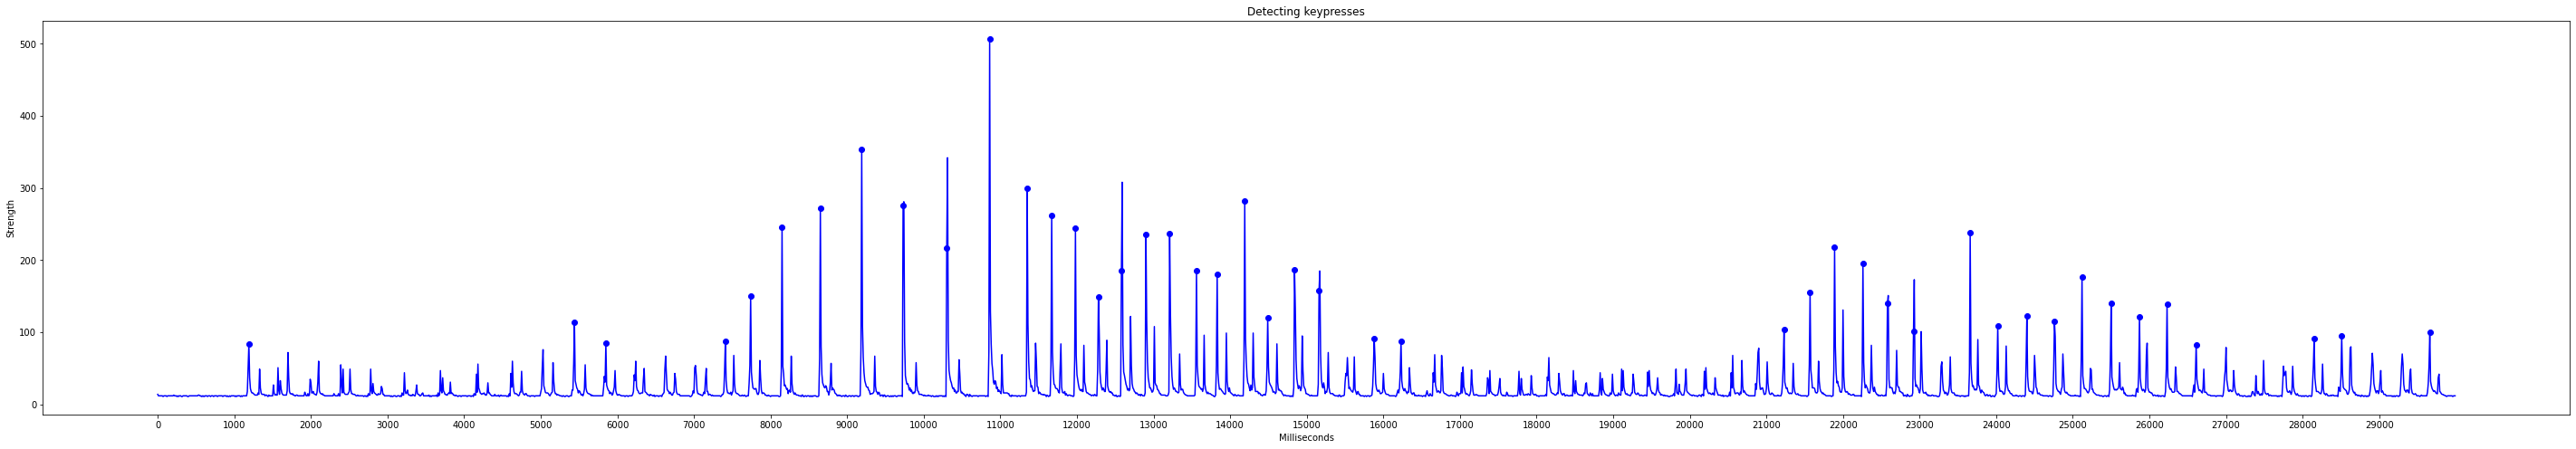

8:


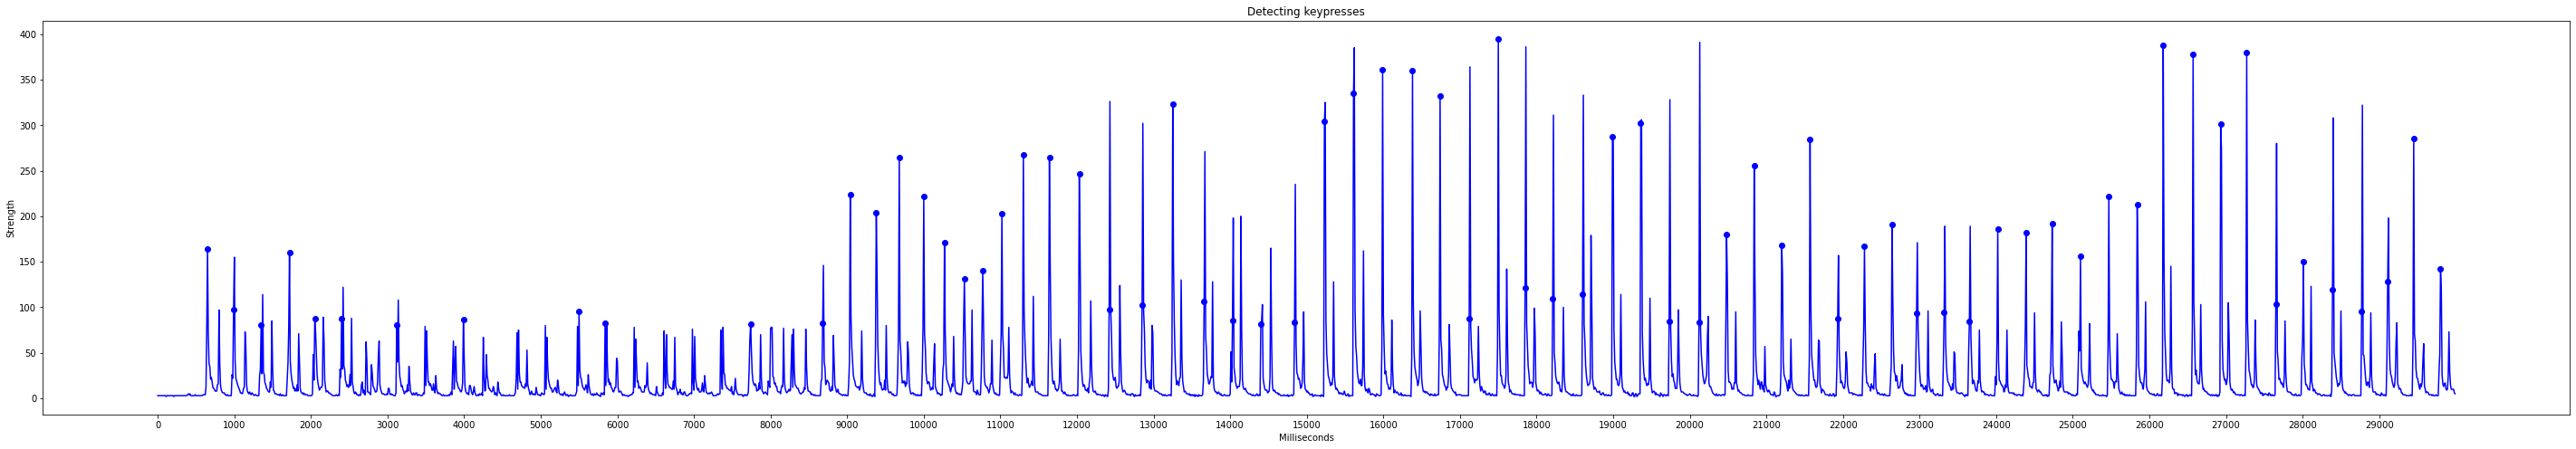

9:


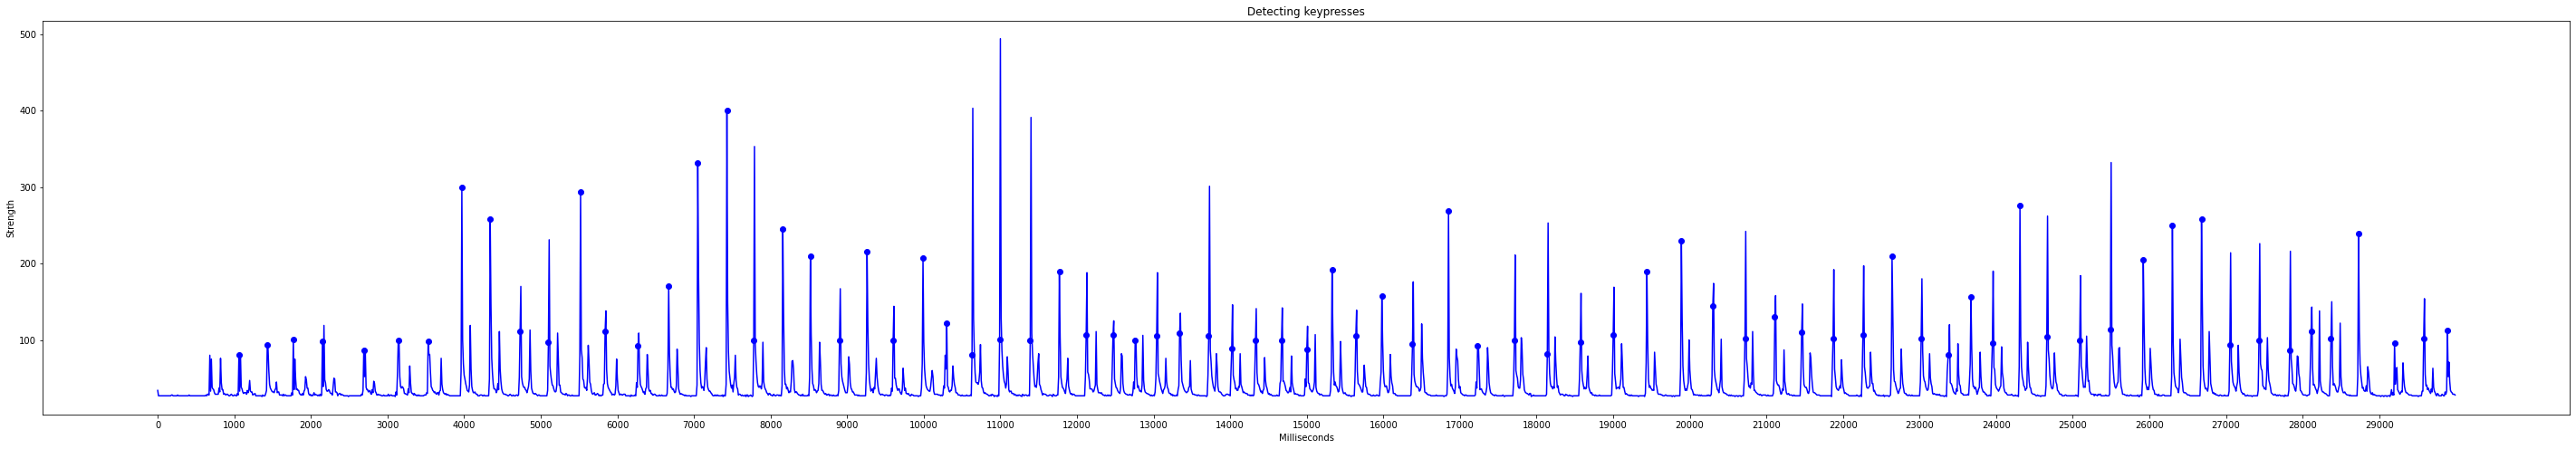

A:


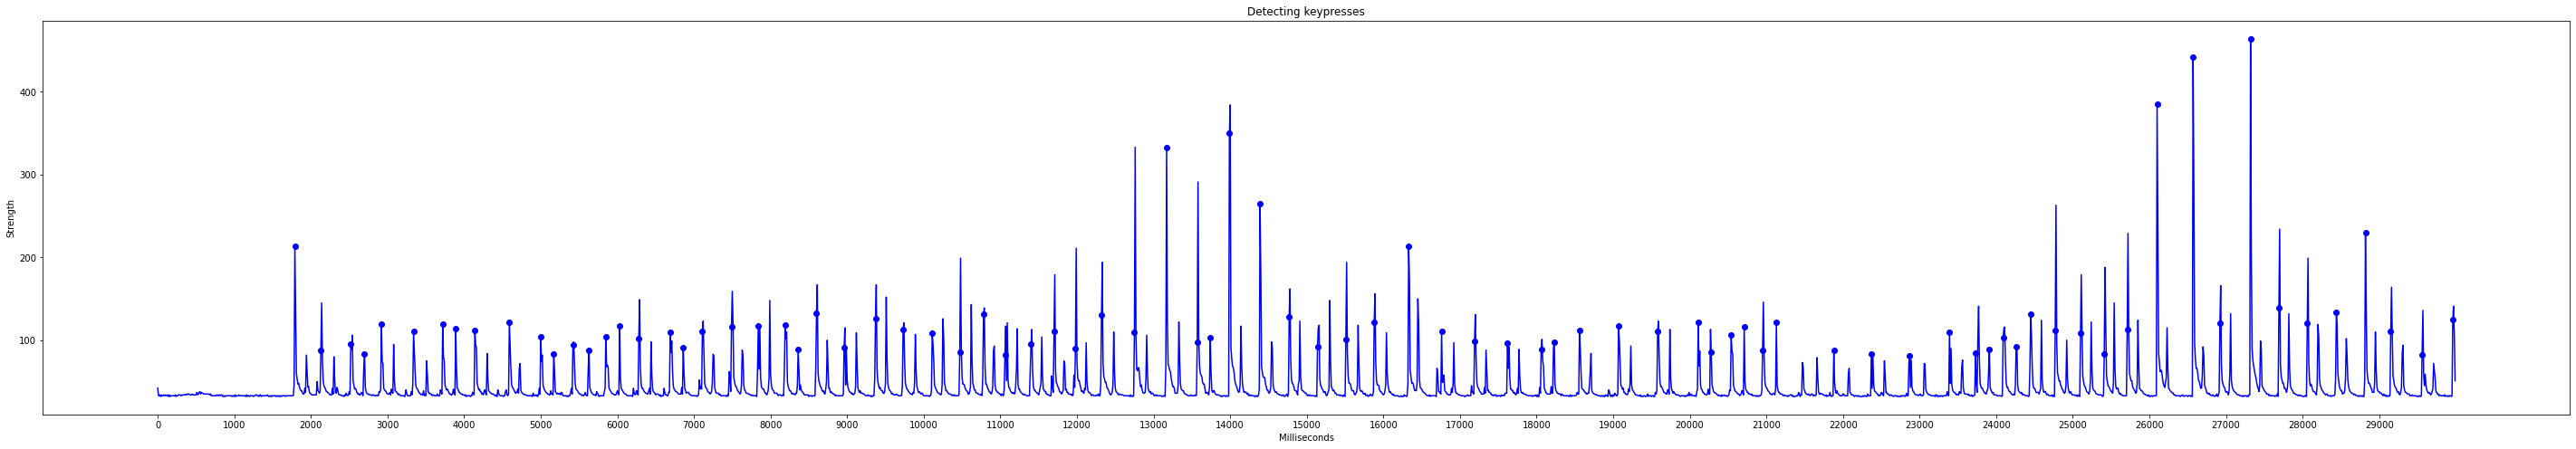

B:


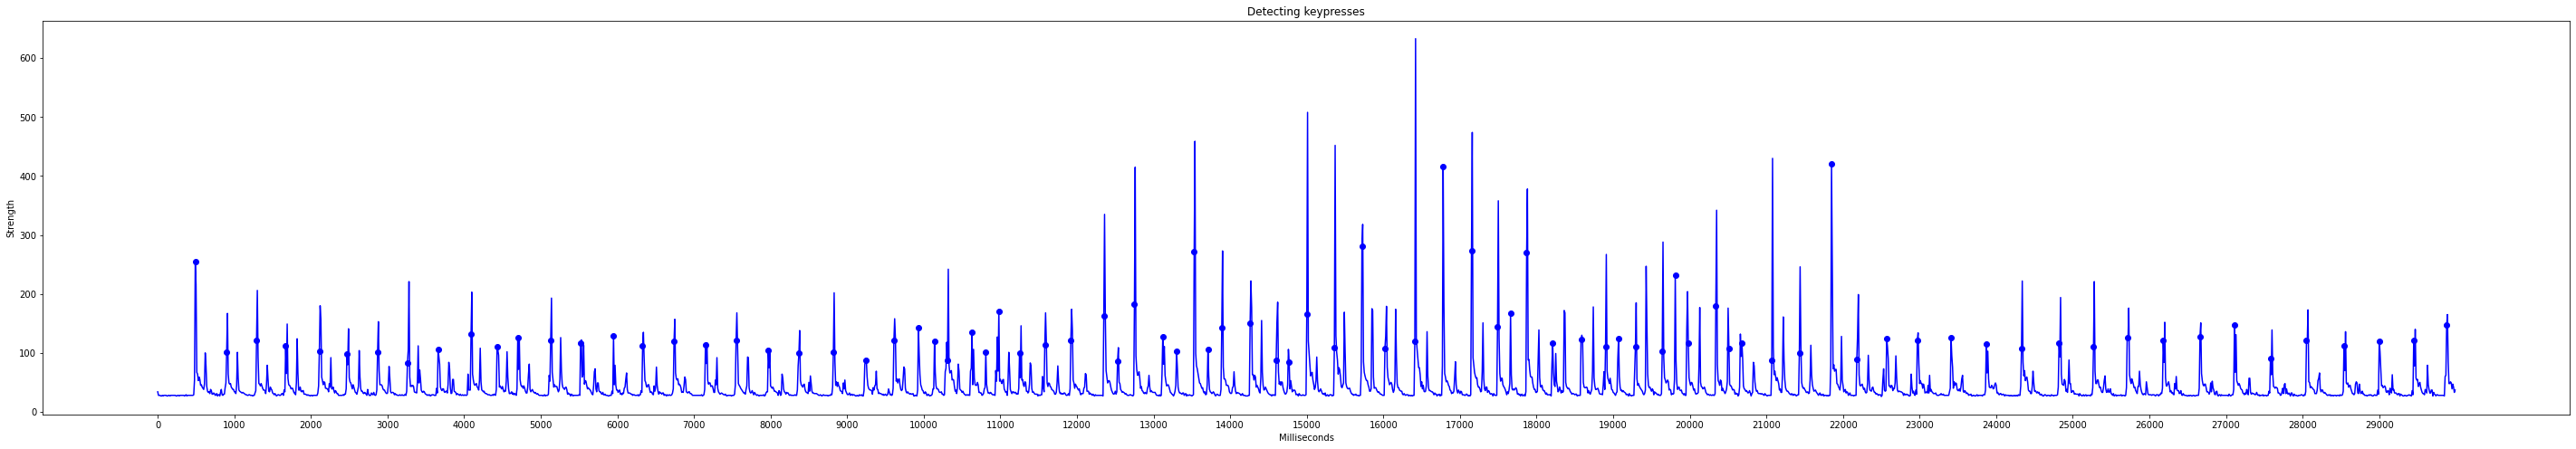

C:


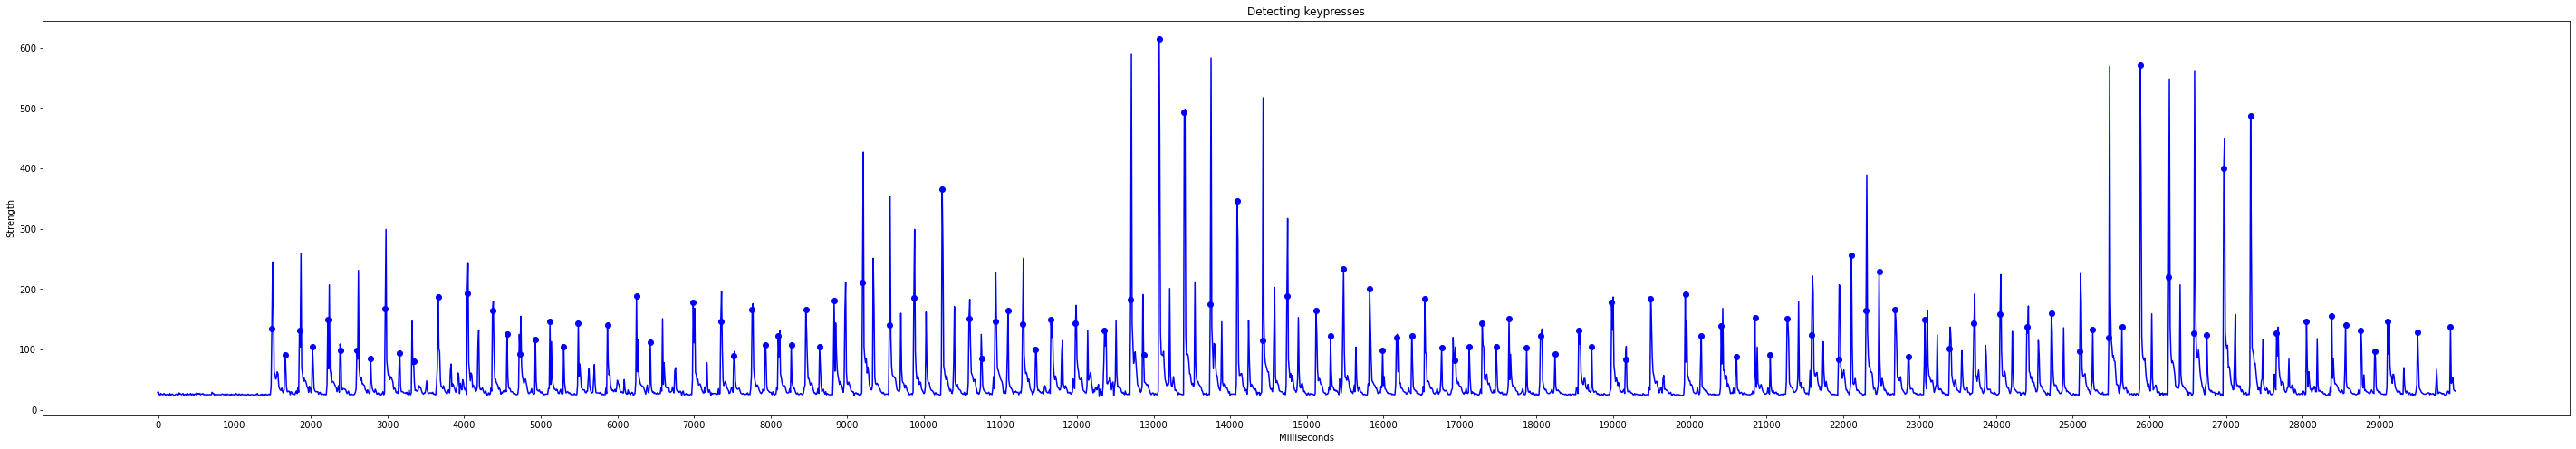

D:


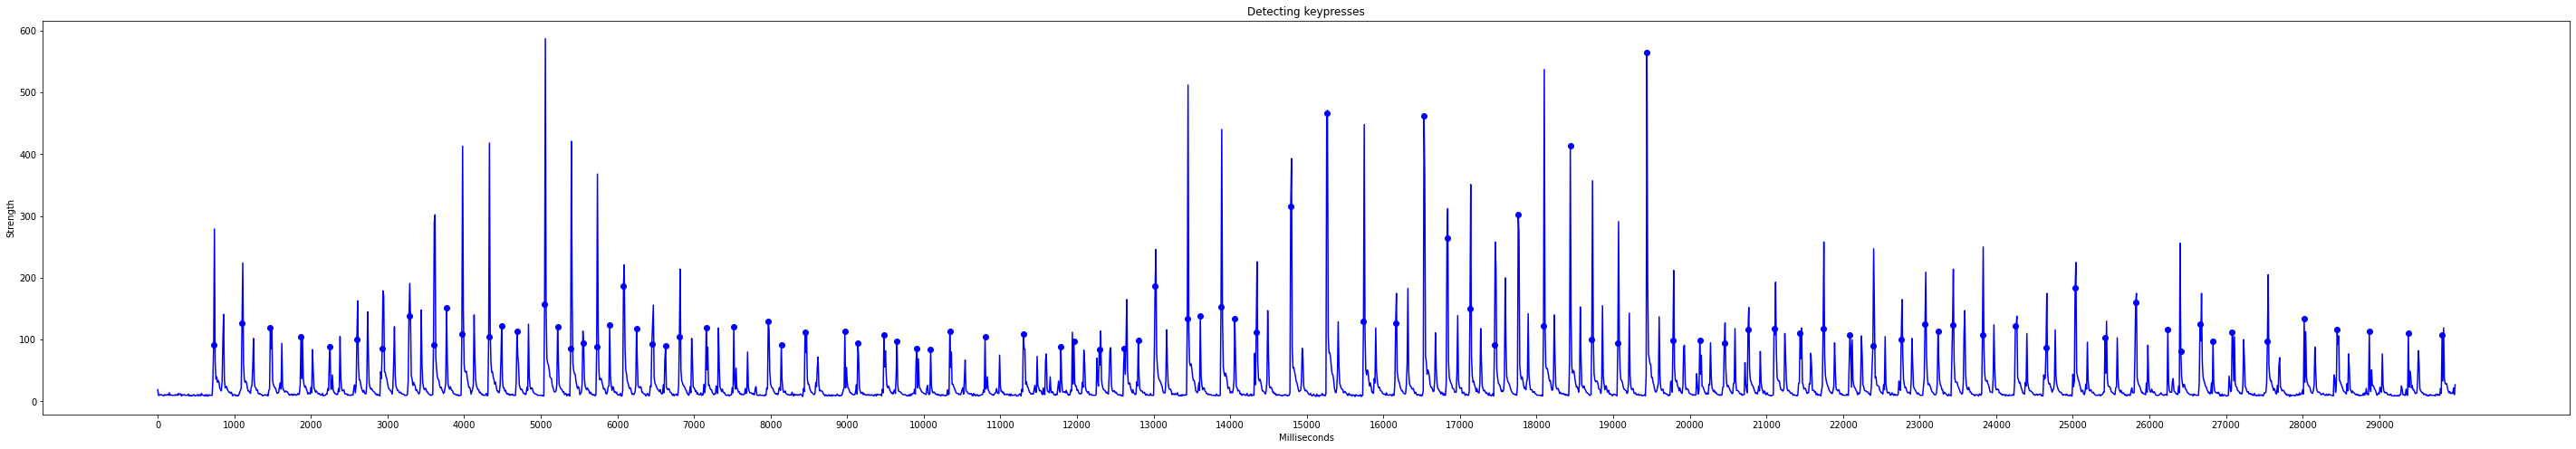

E:


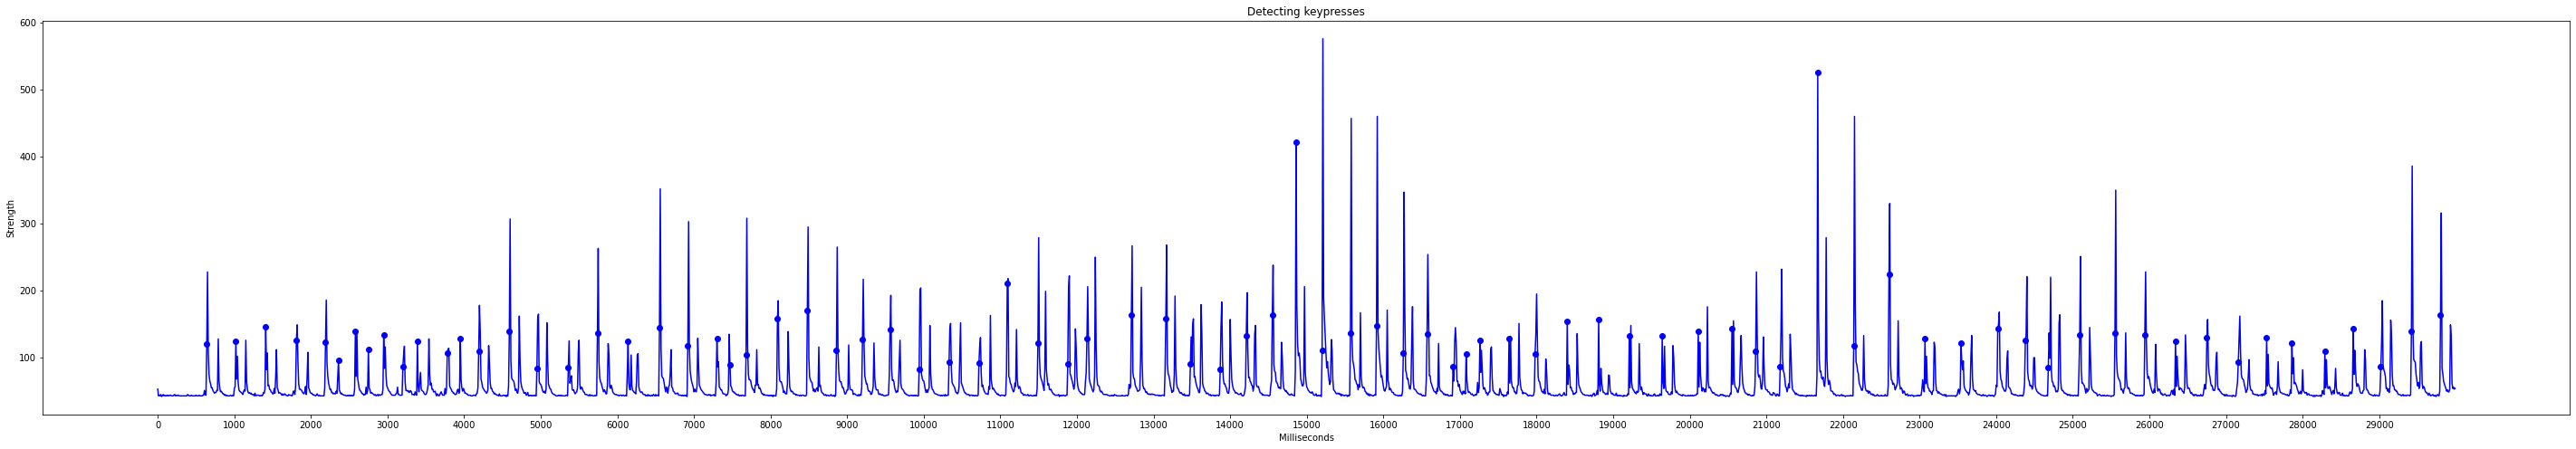

Enter:


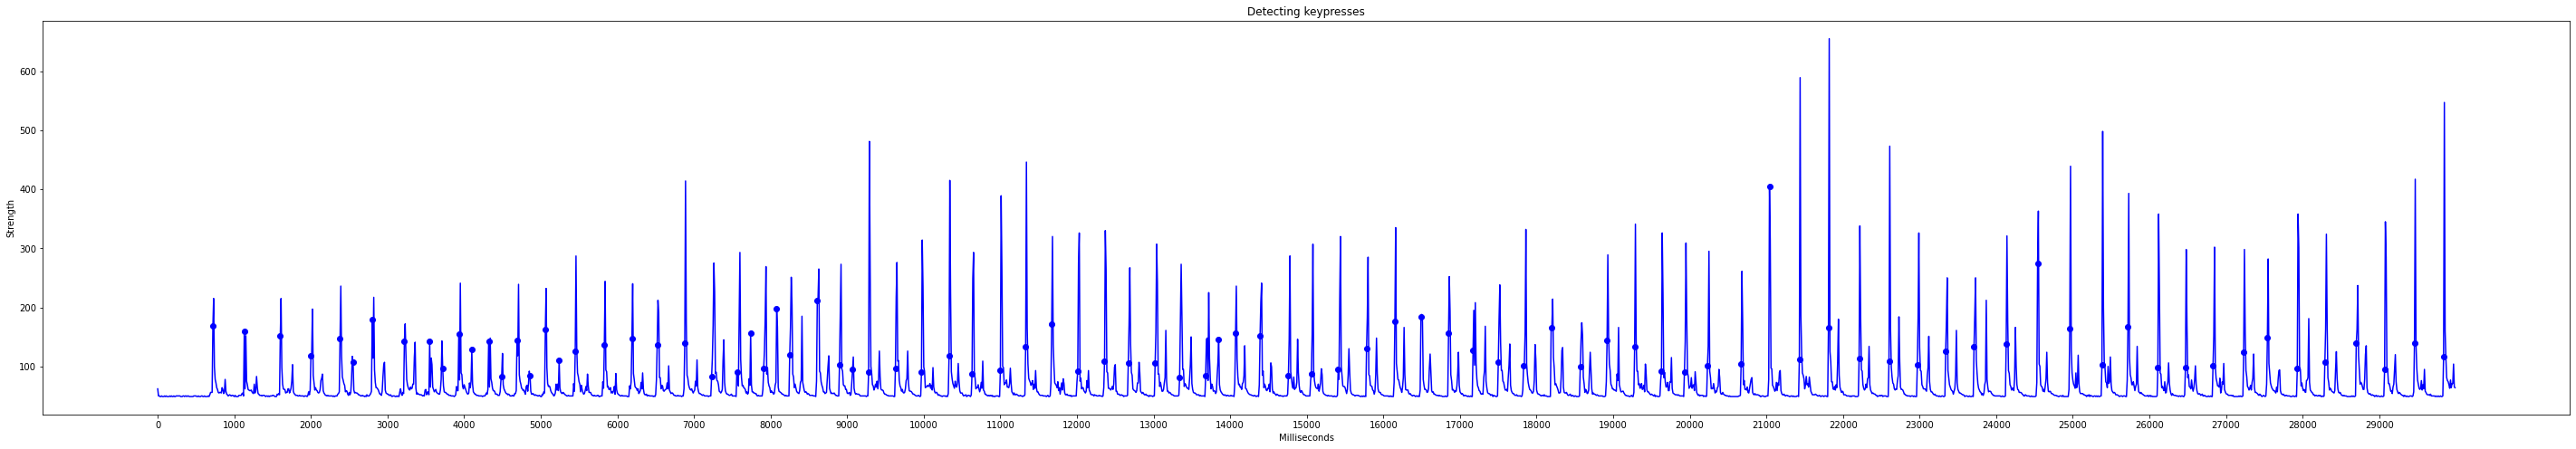

F:


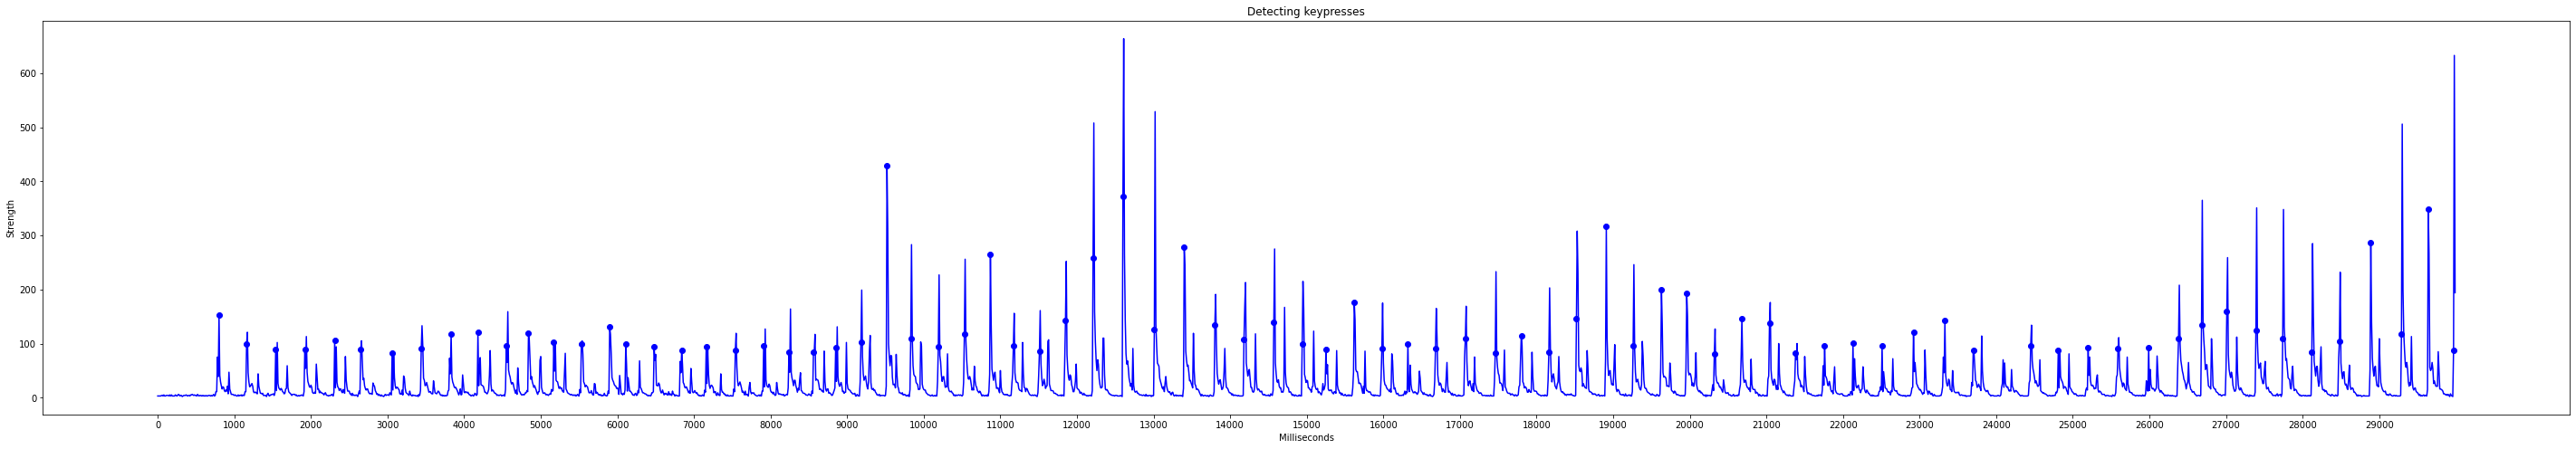

G:


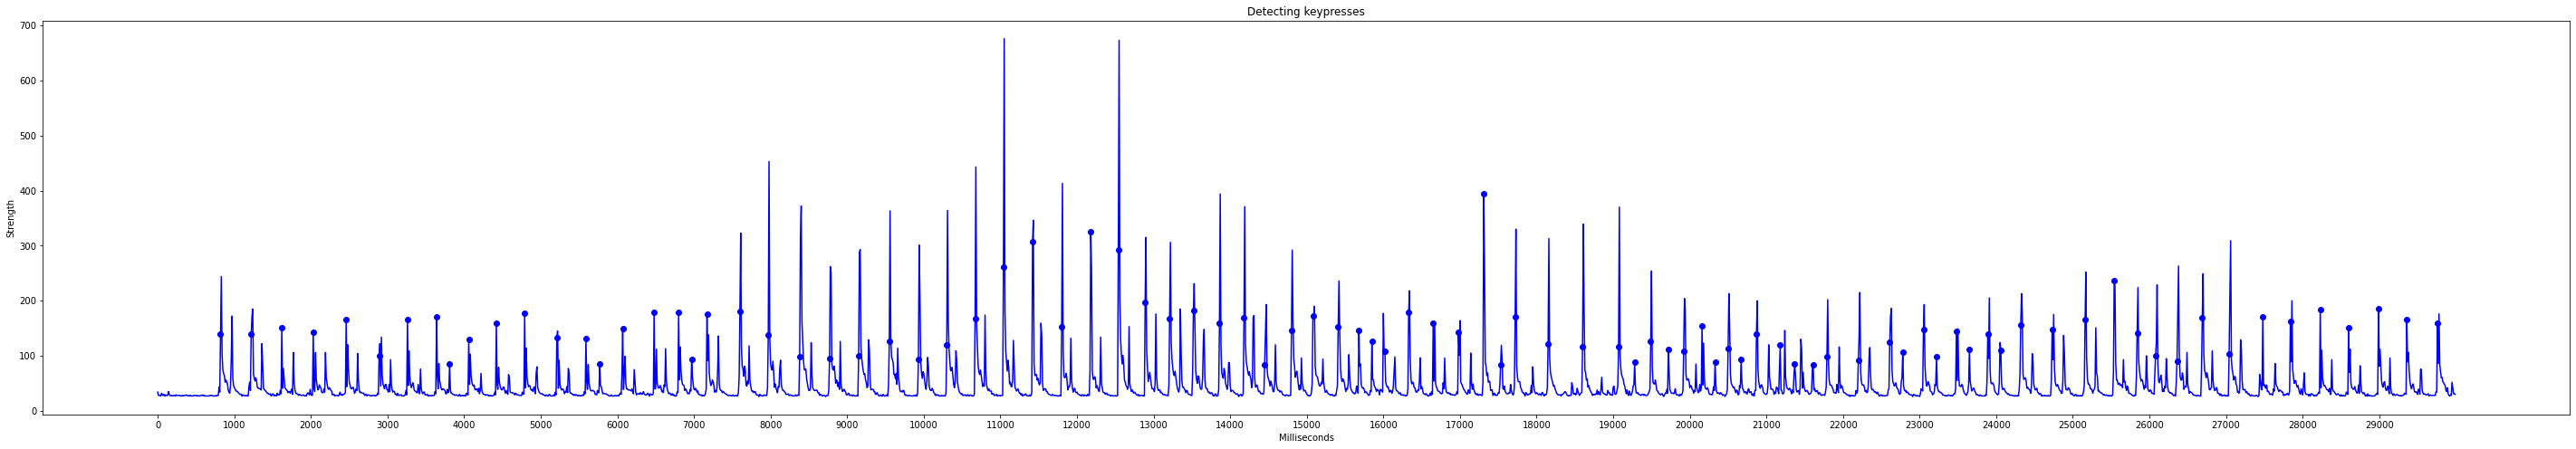

H:


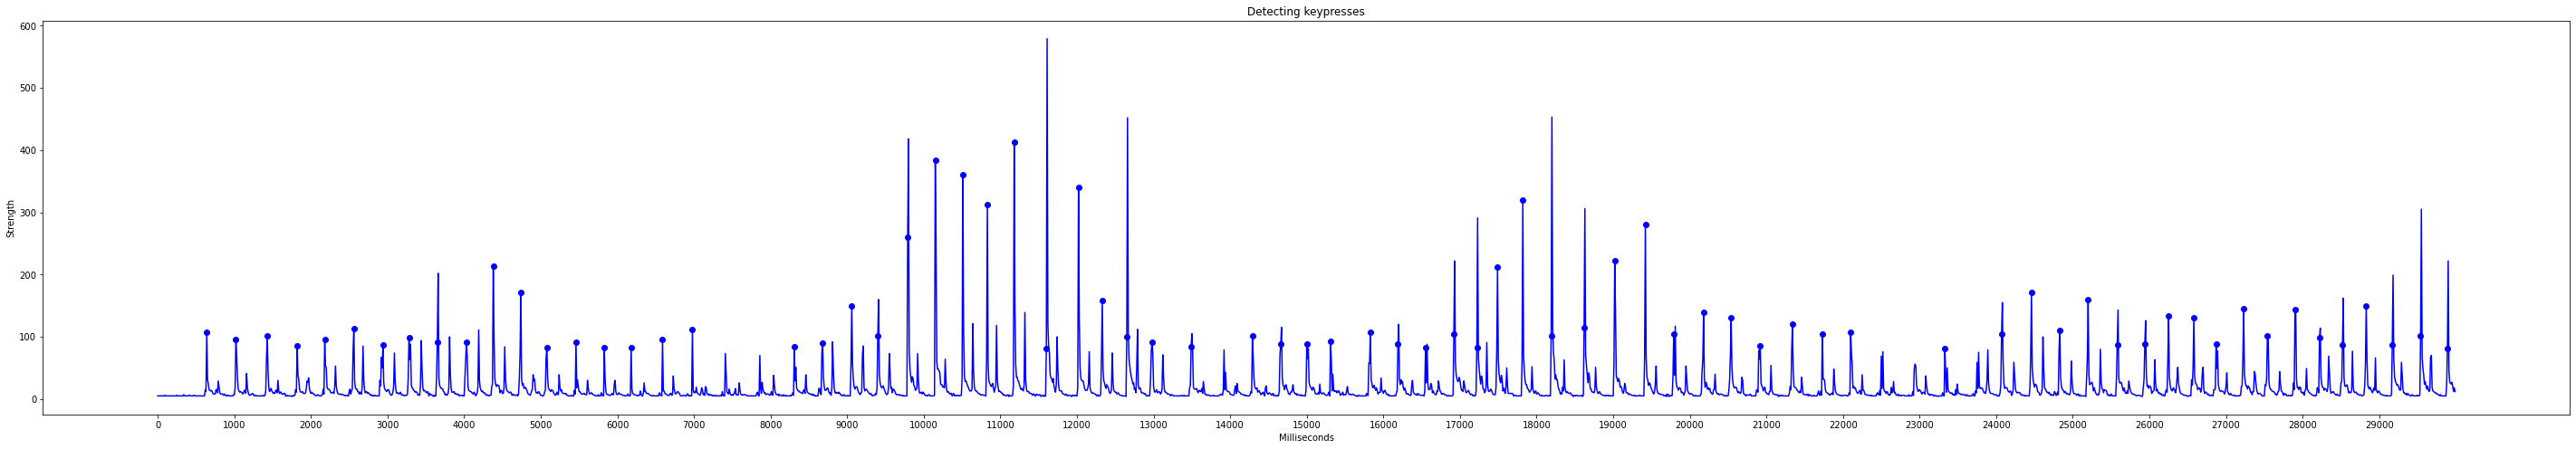

I:


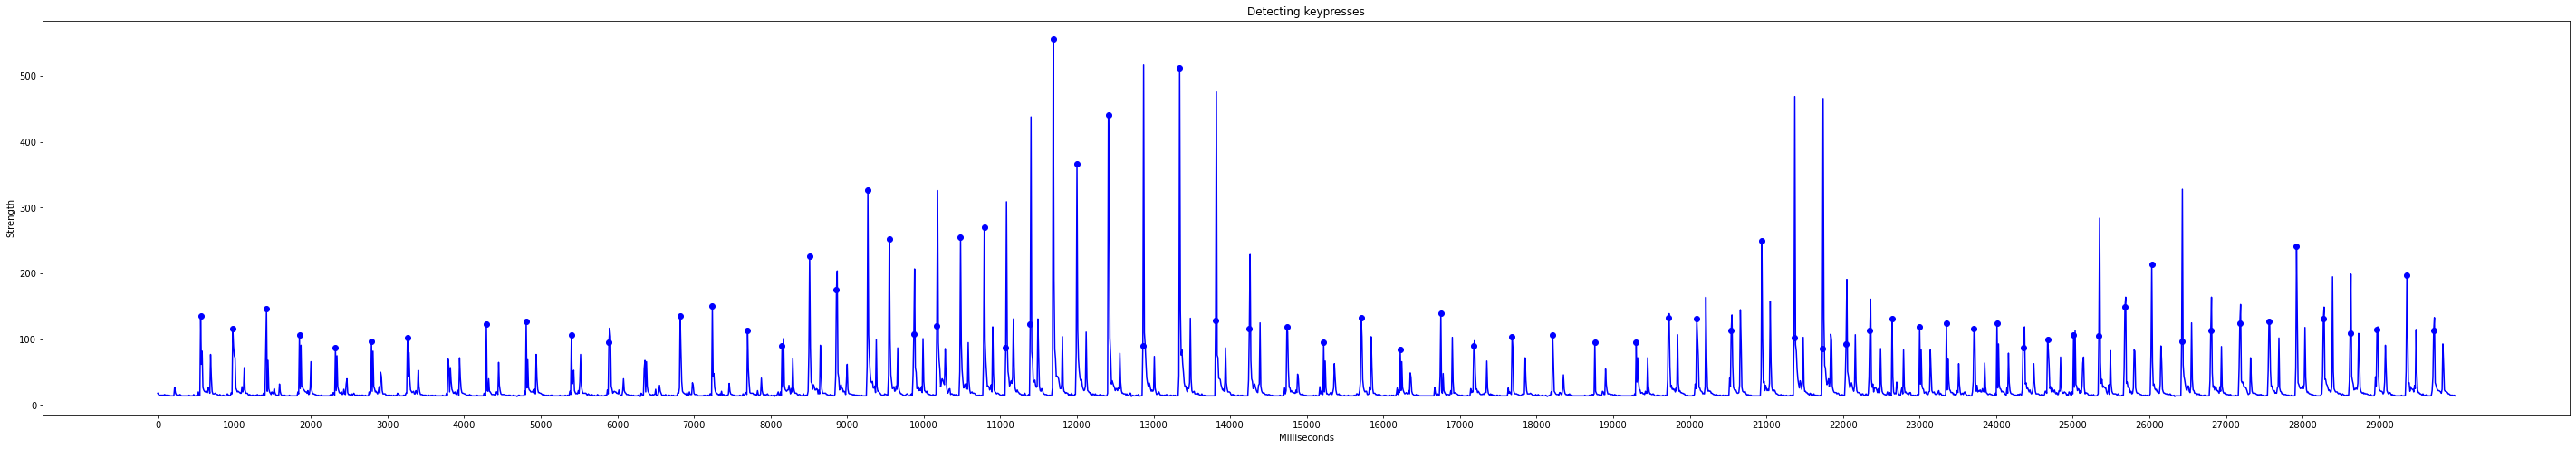

J:


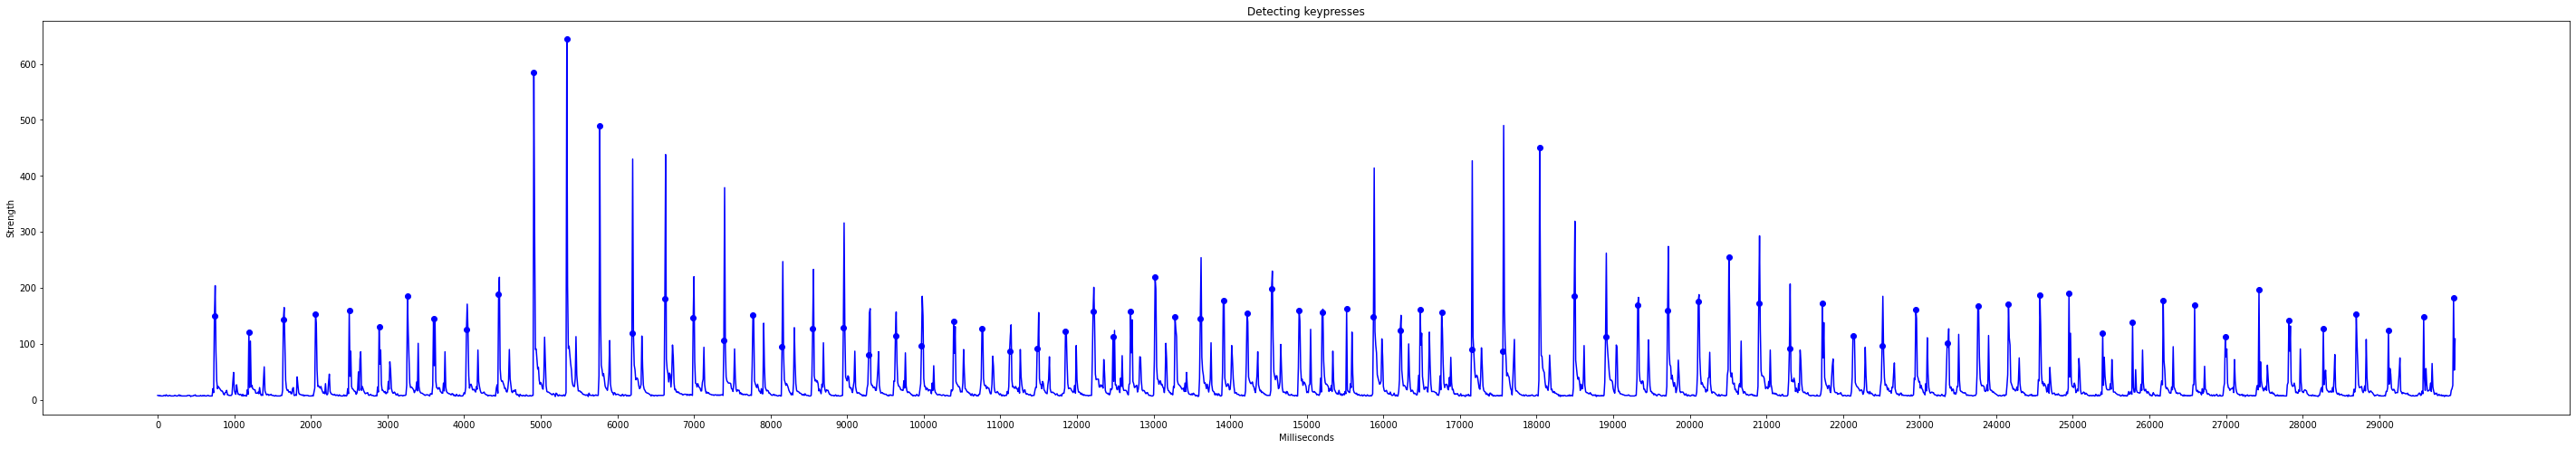

K:


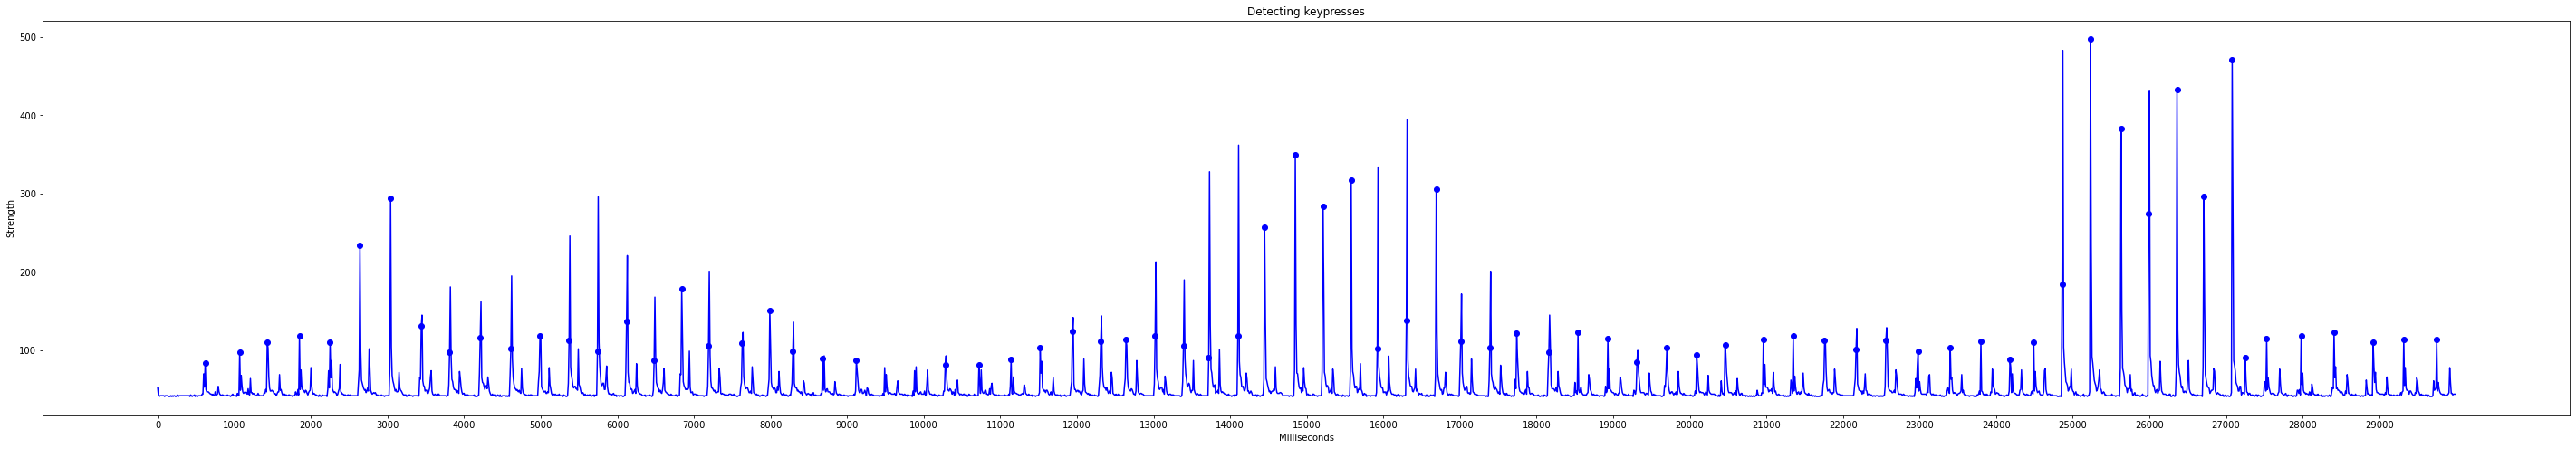

L:


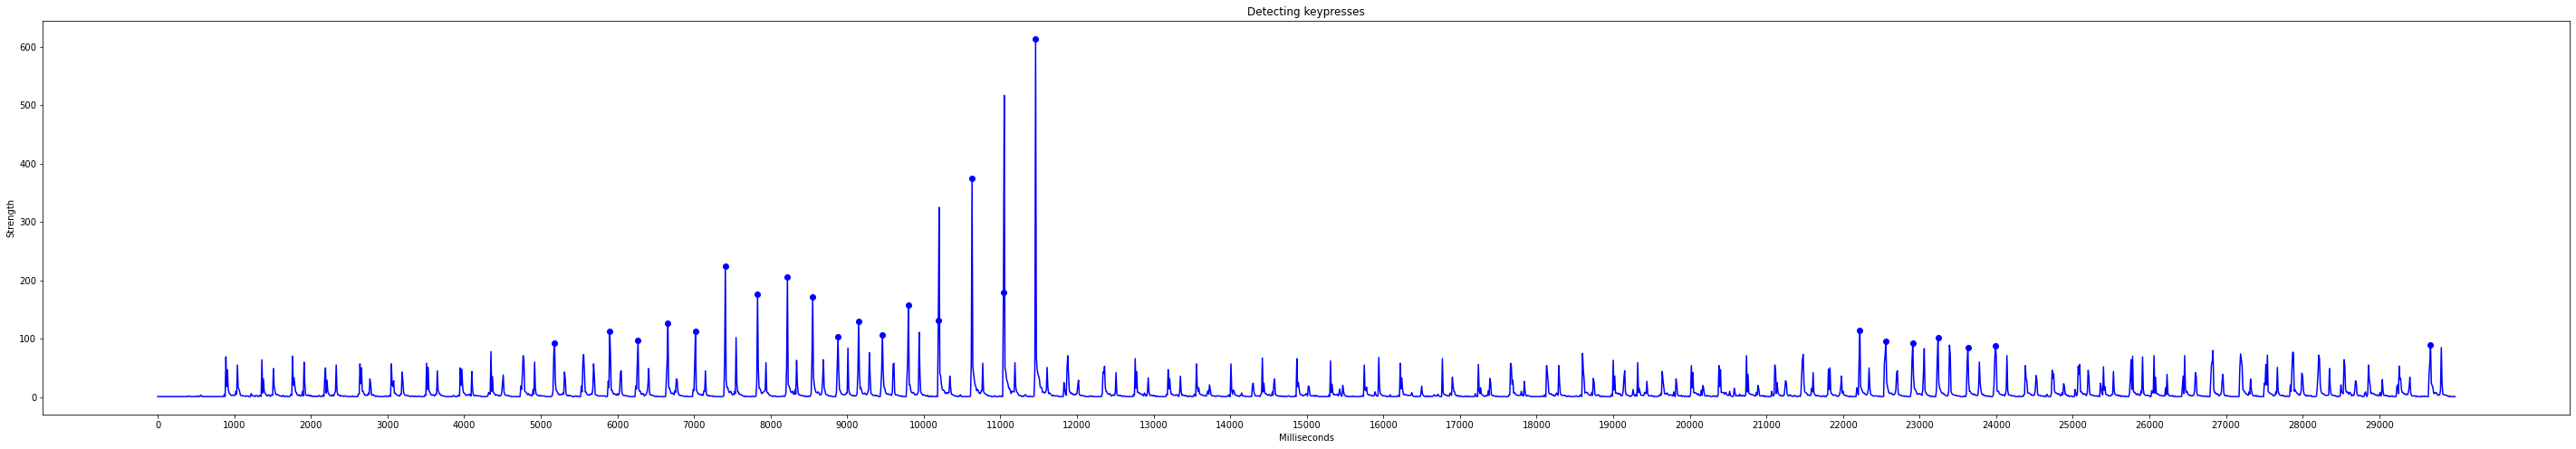

M:


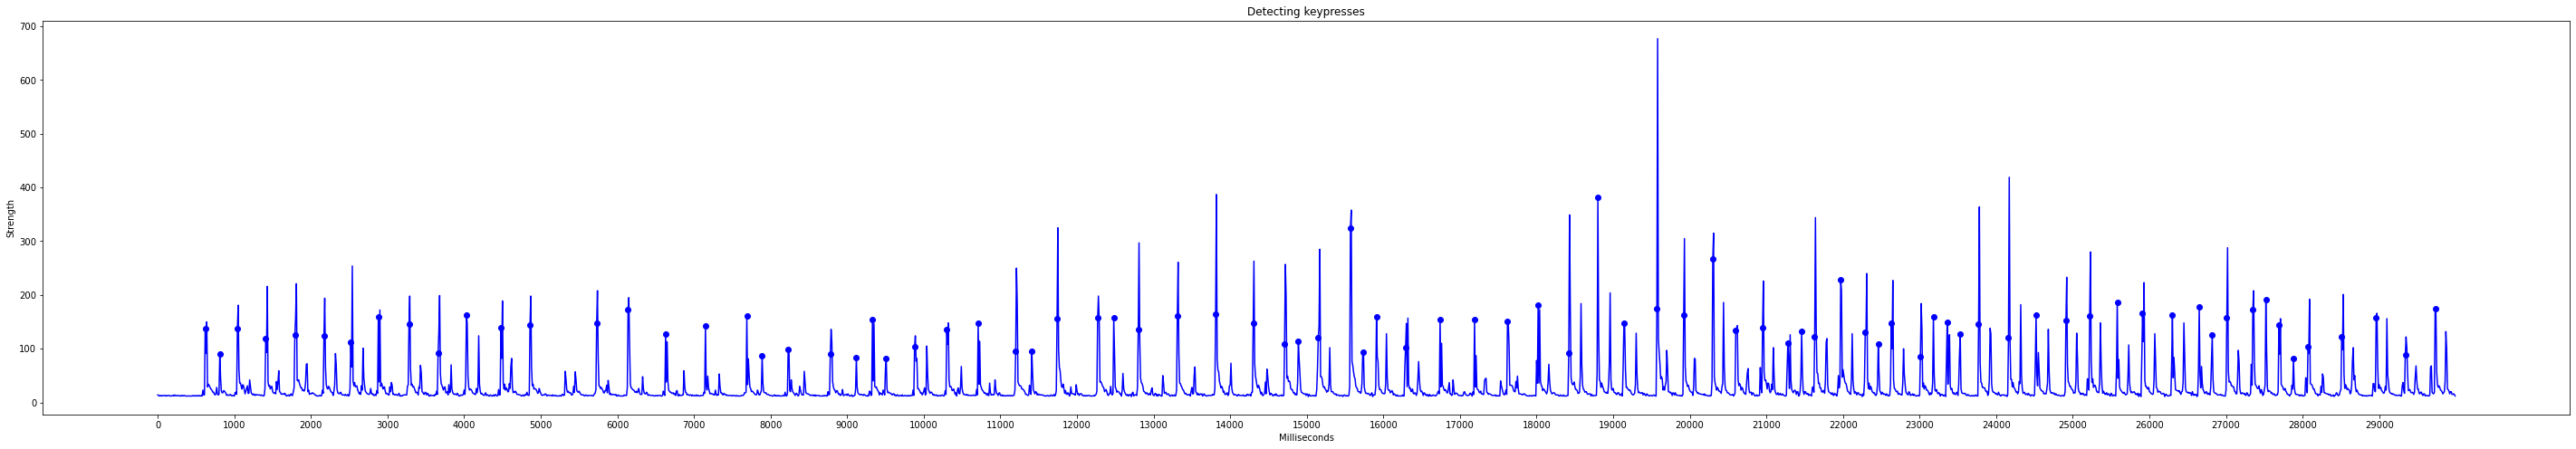

N:


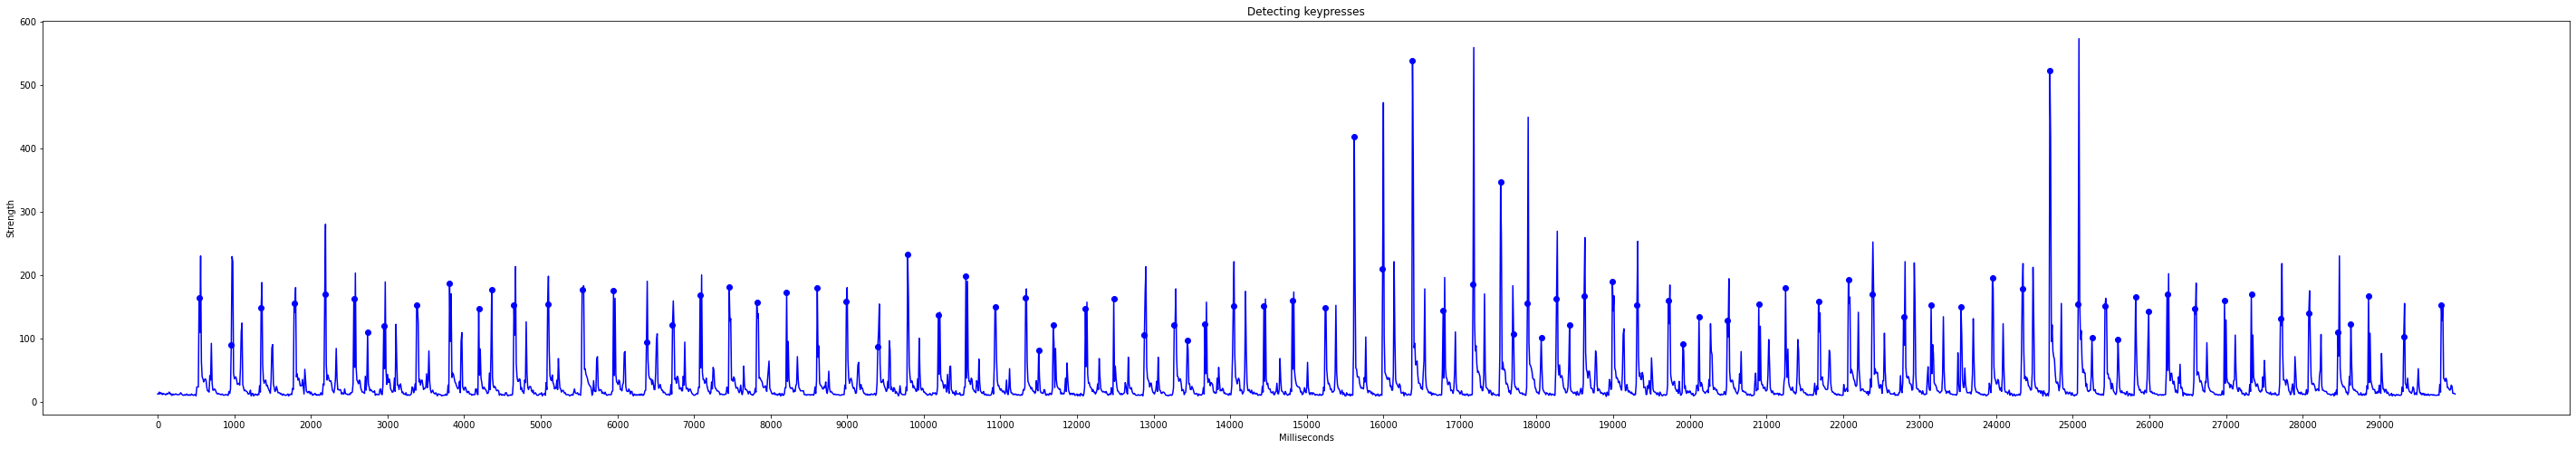

O:


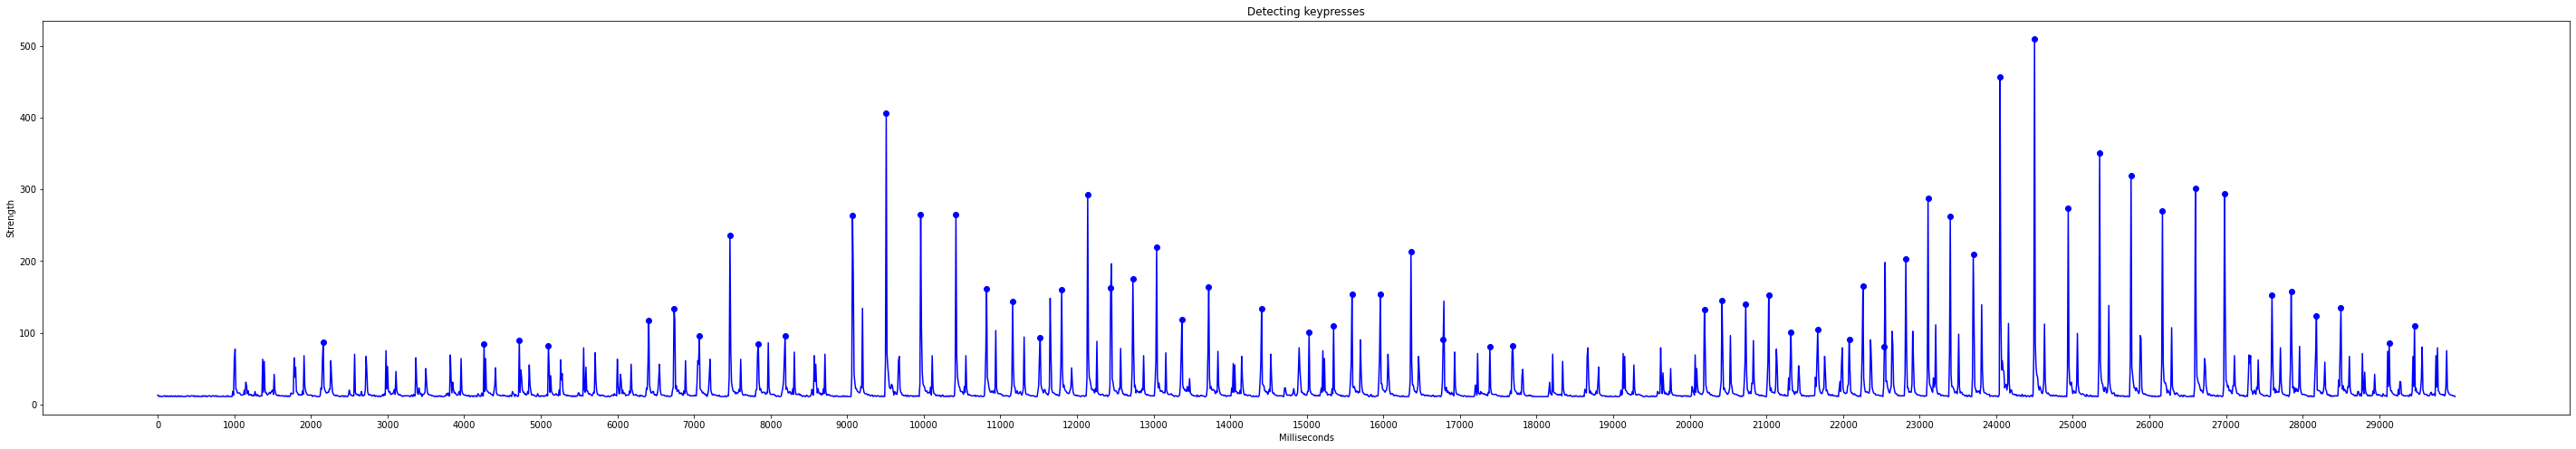

P:


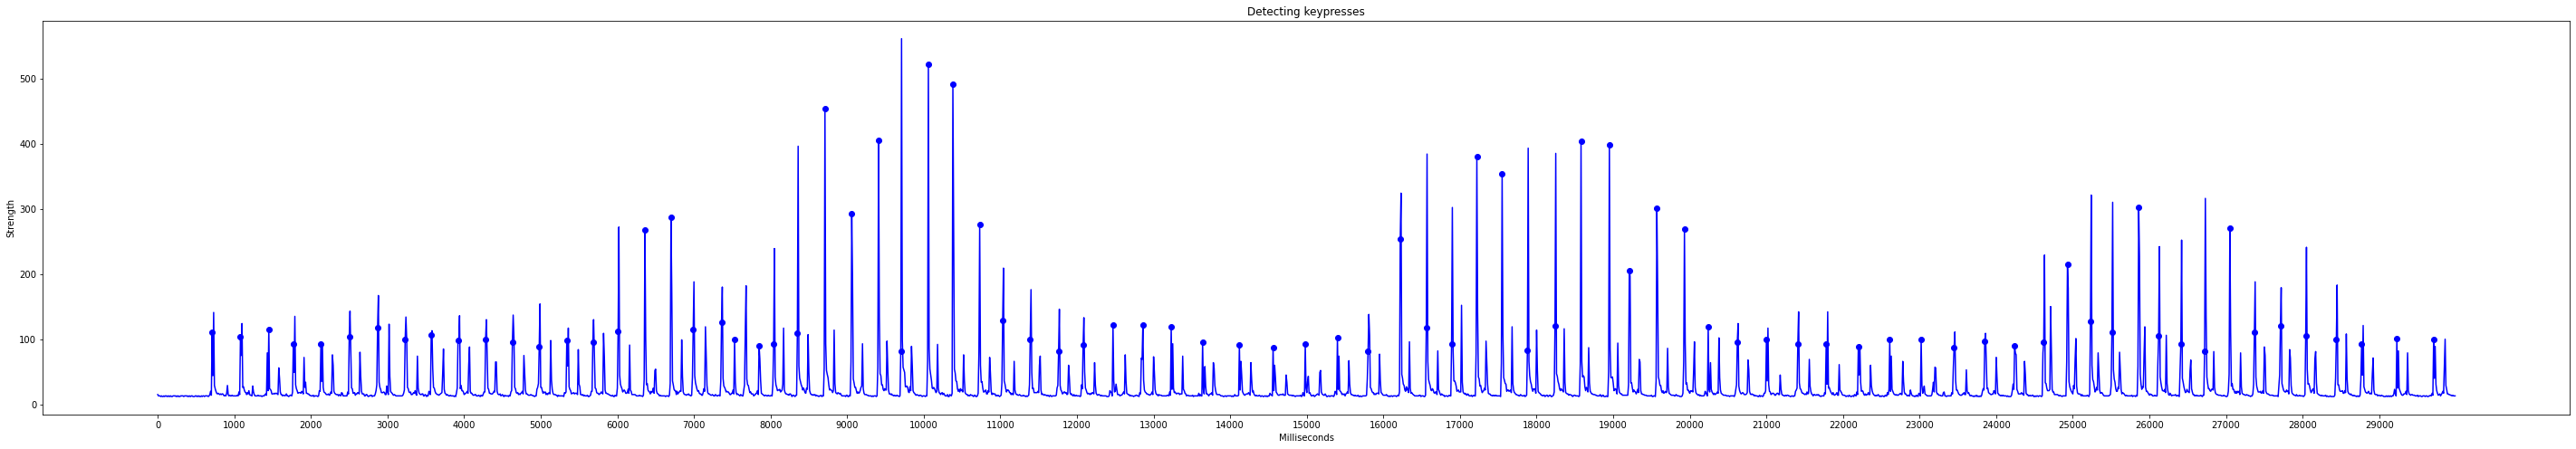

Q:


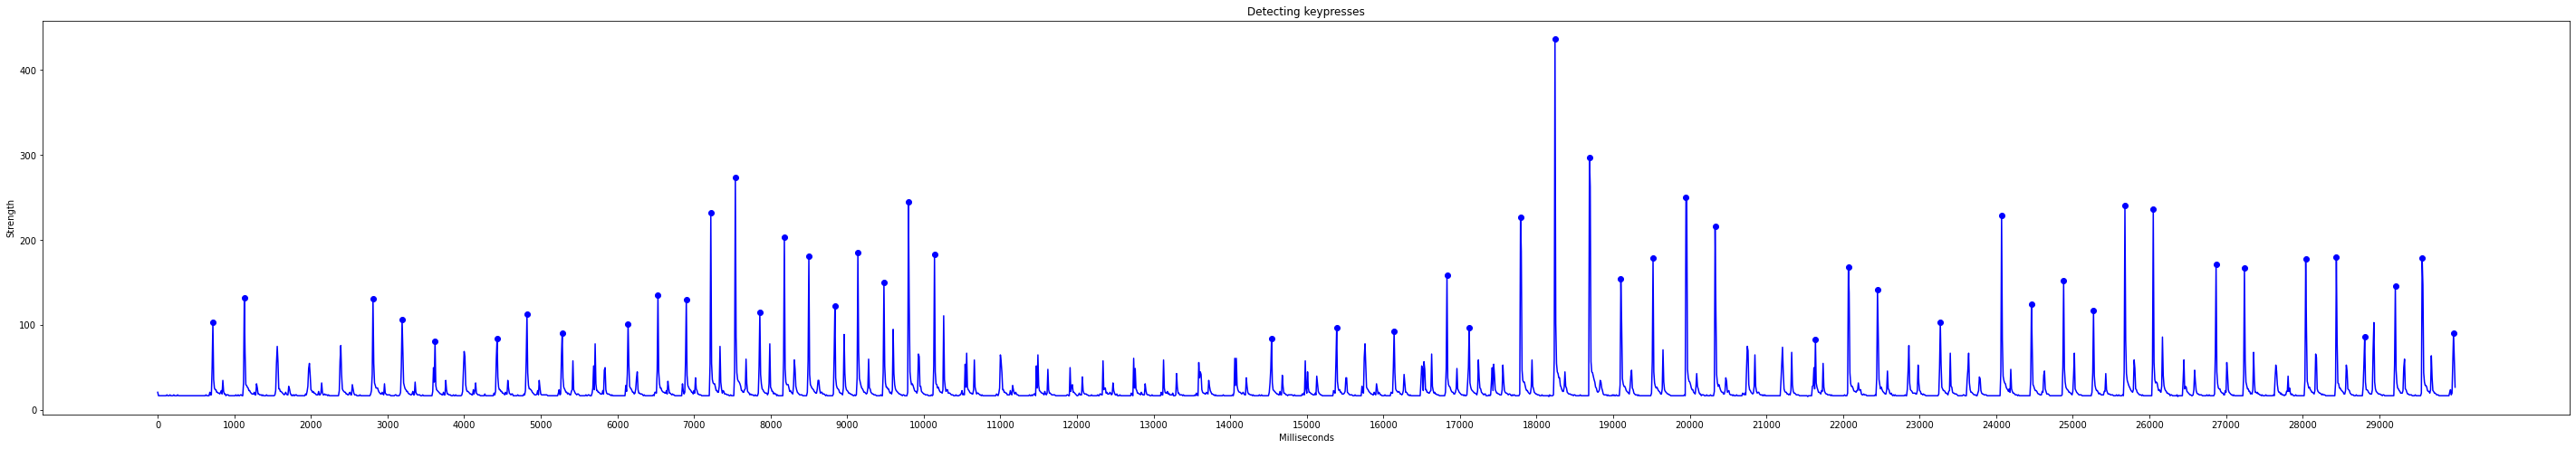

R:


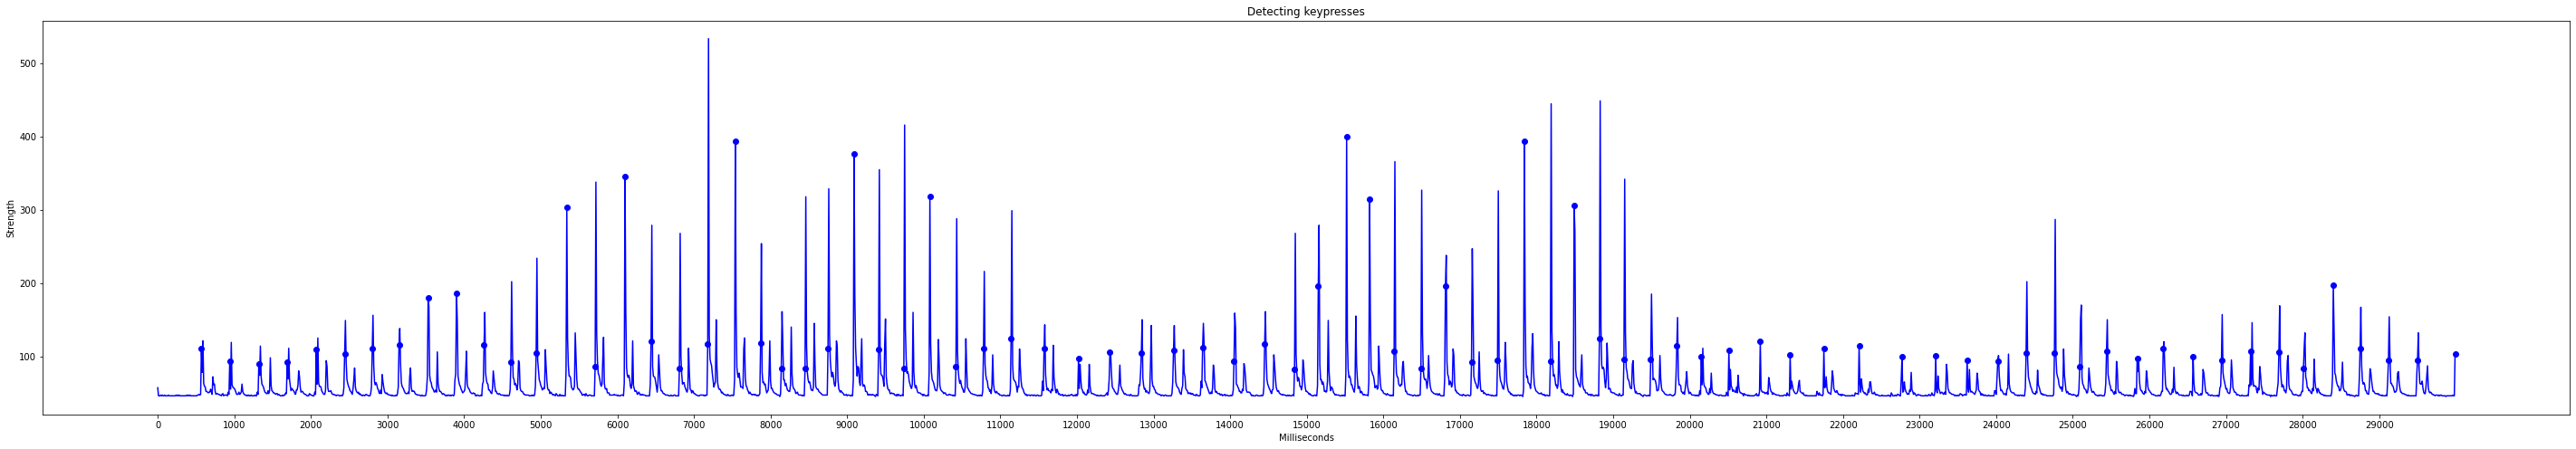

S:


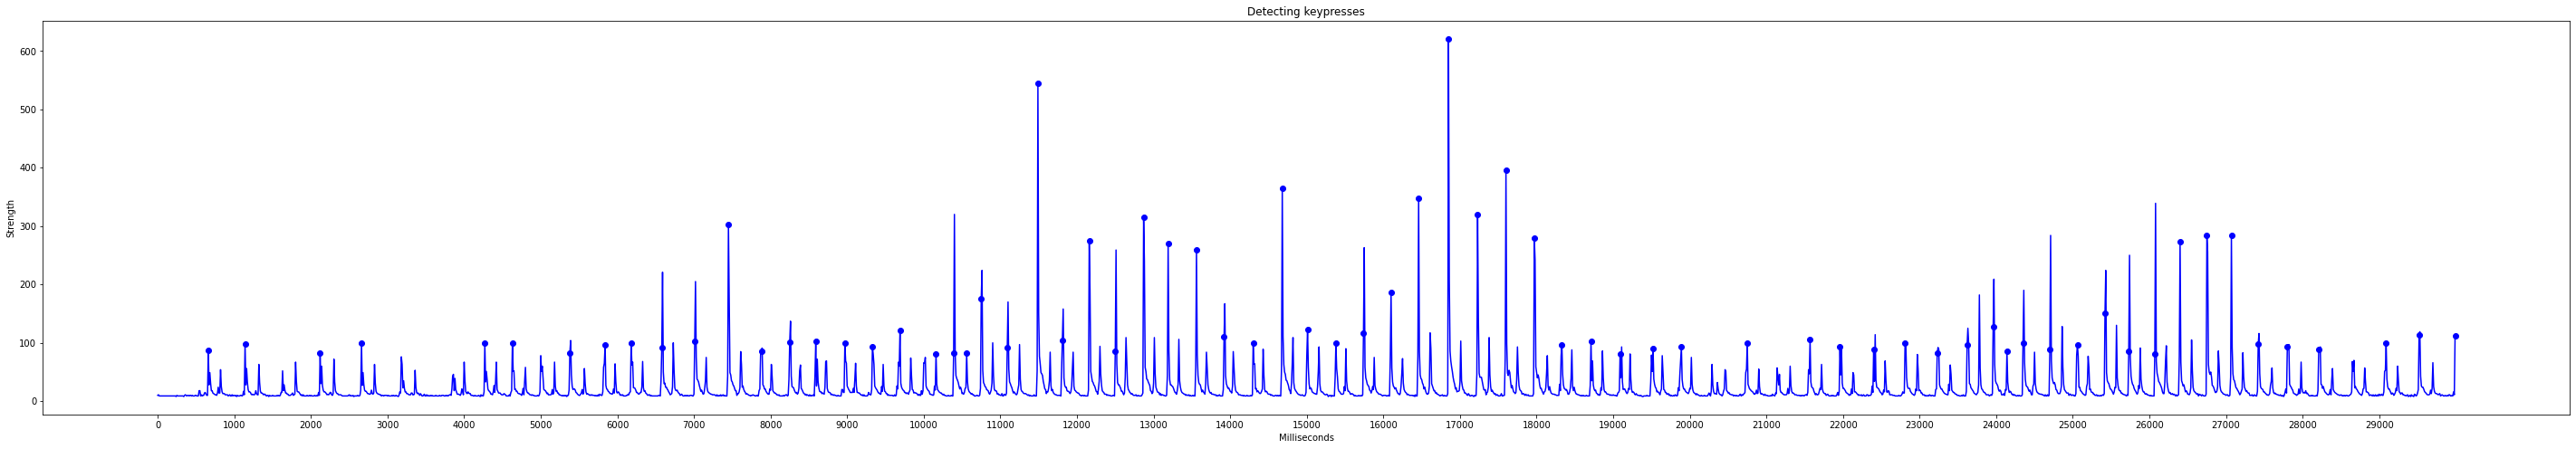

Shift:


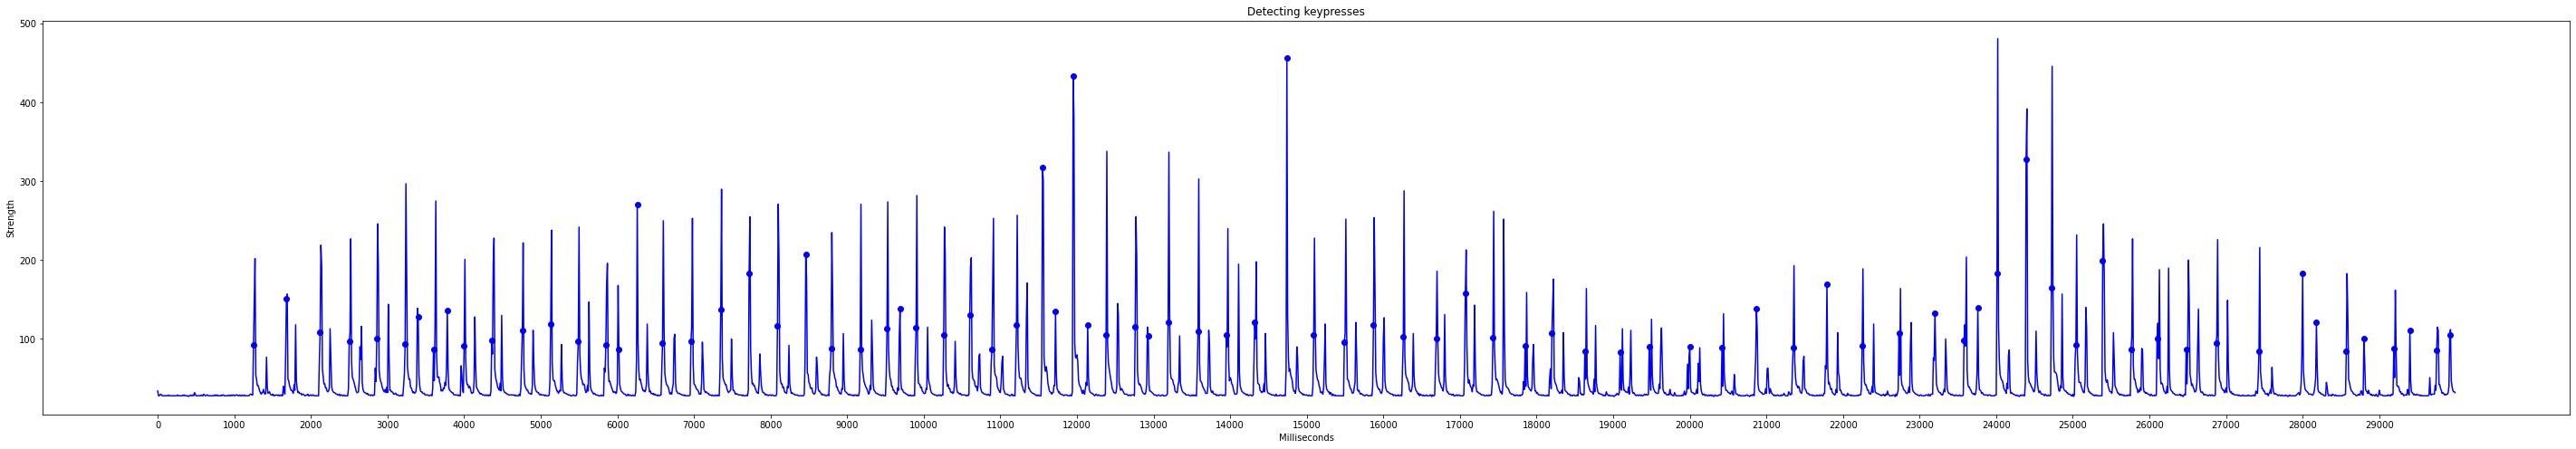

Slash:


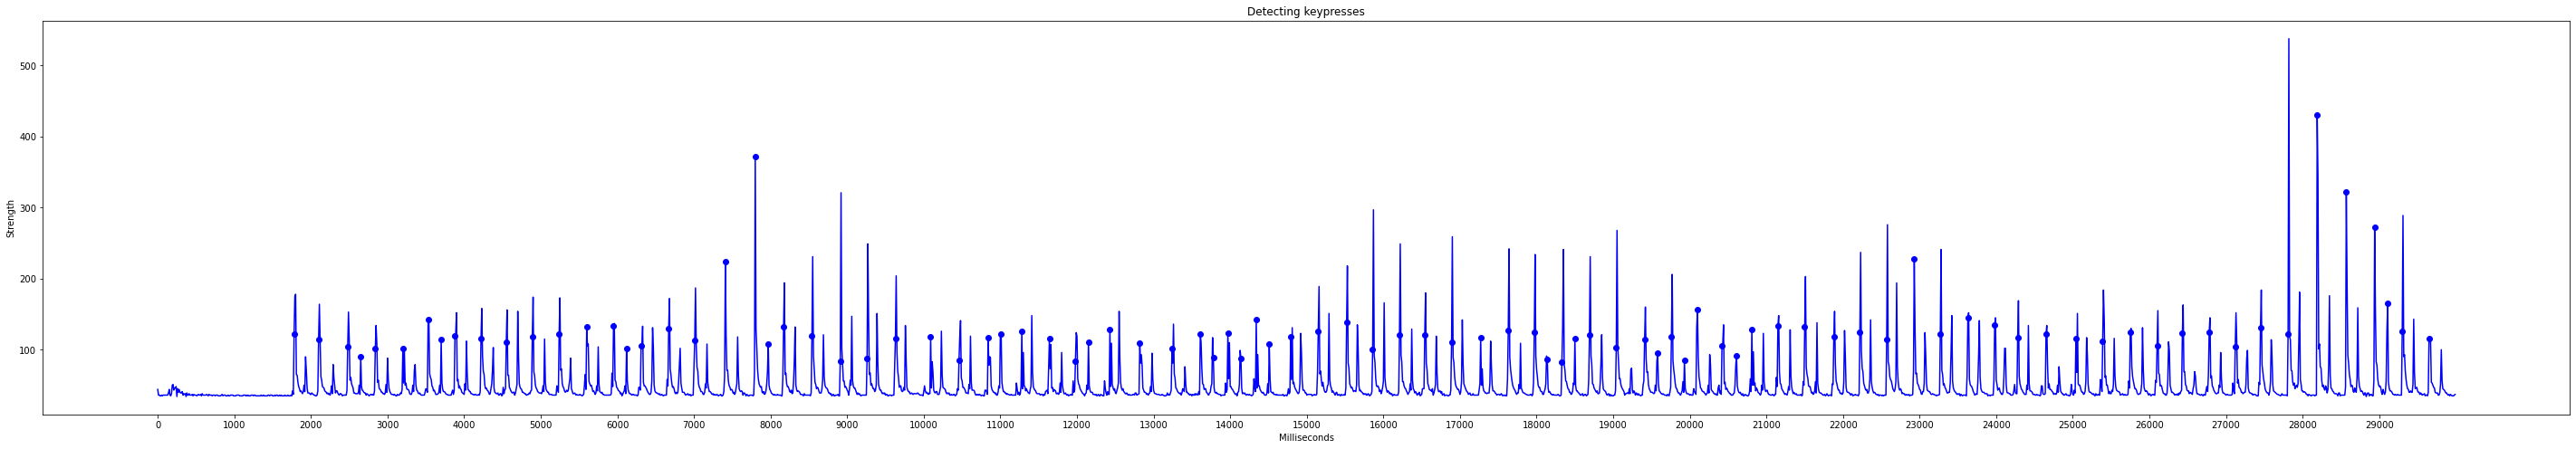

Space:


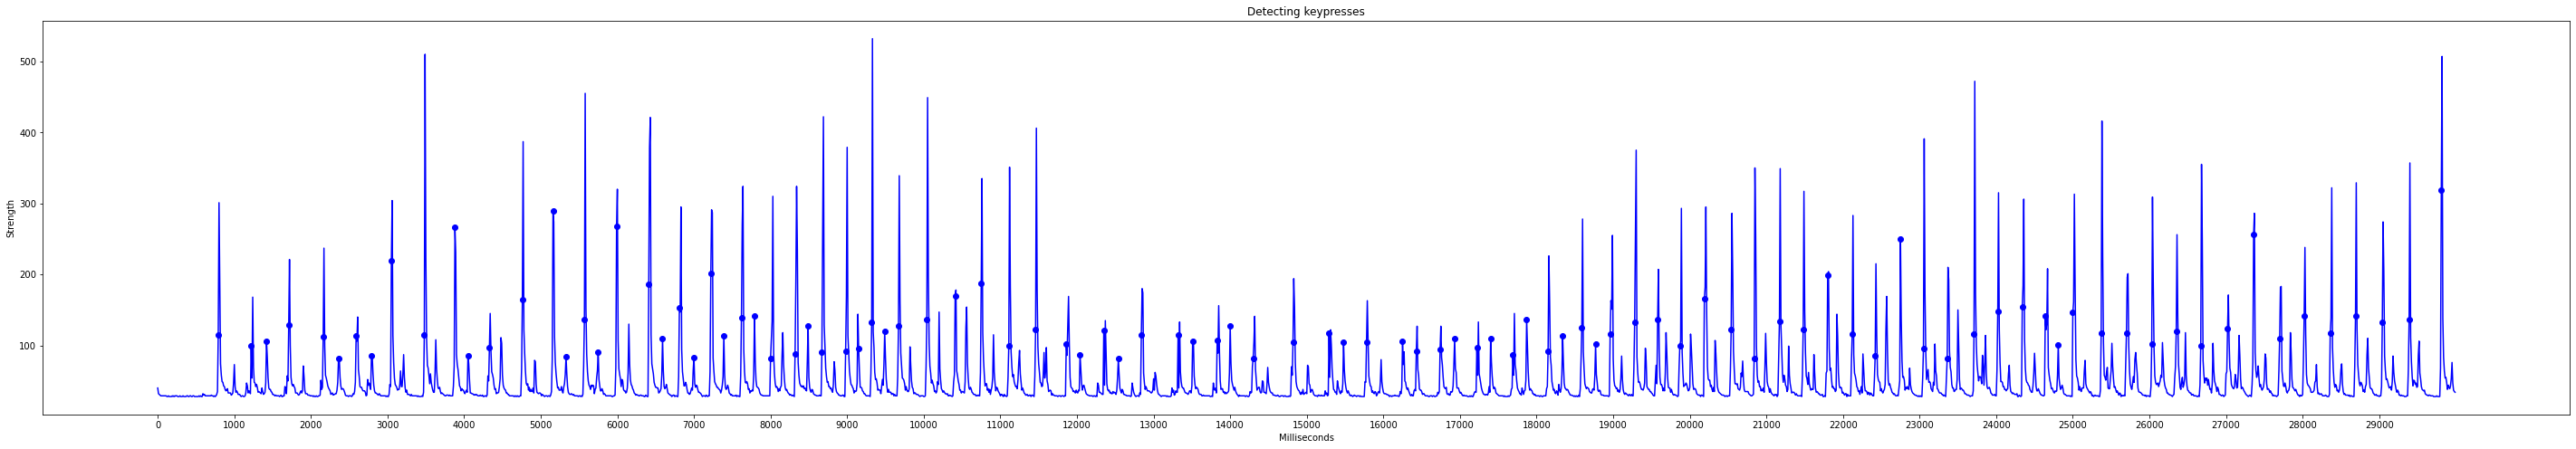

T:


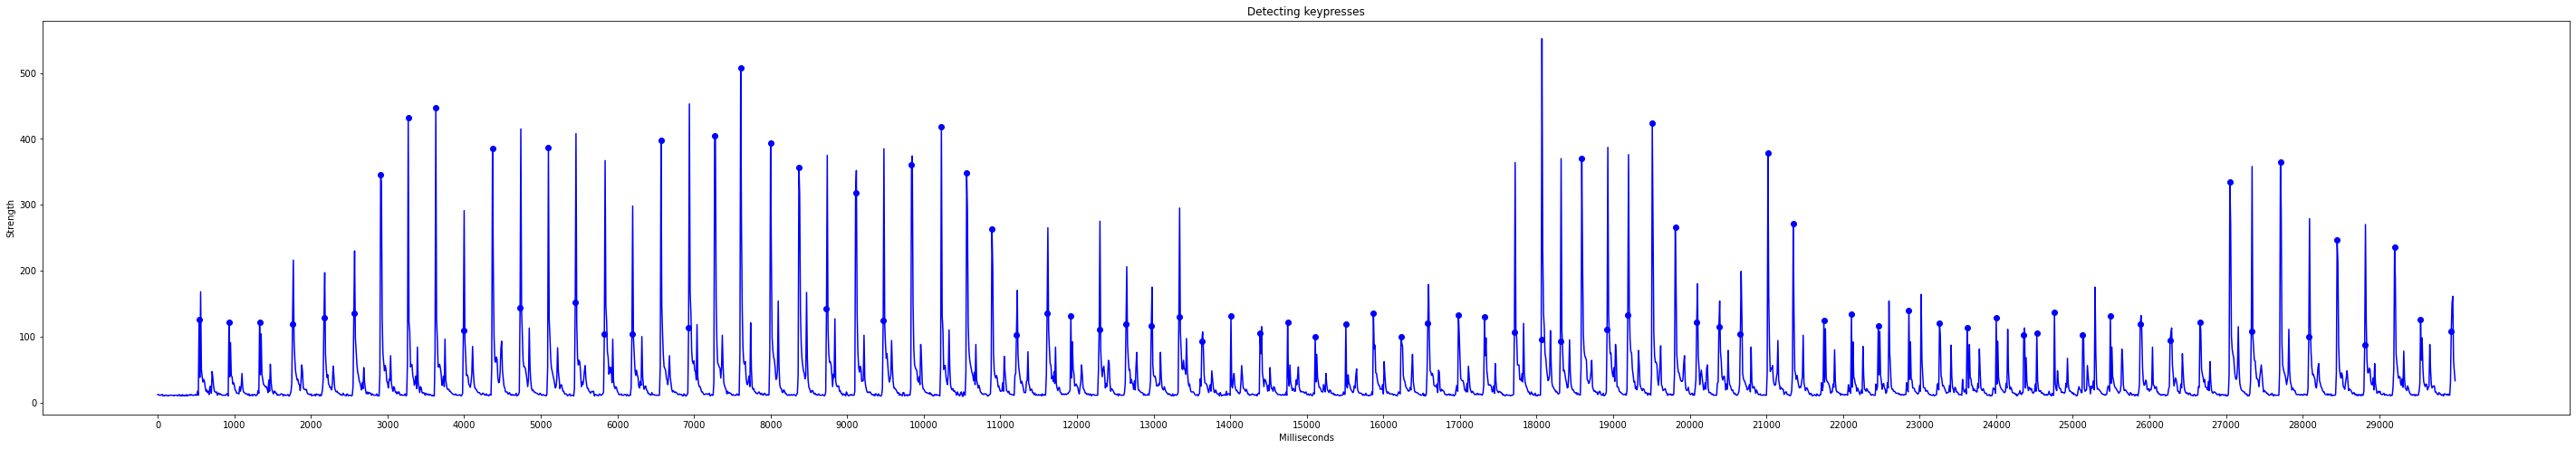

U:


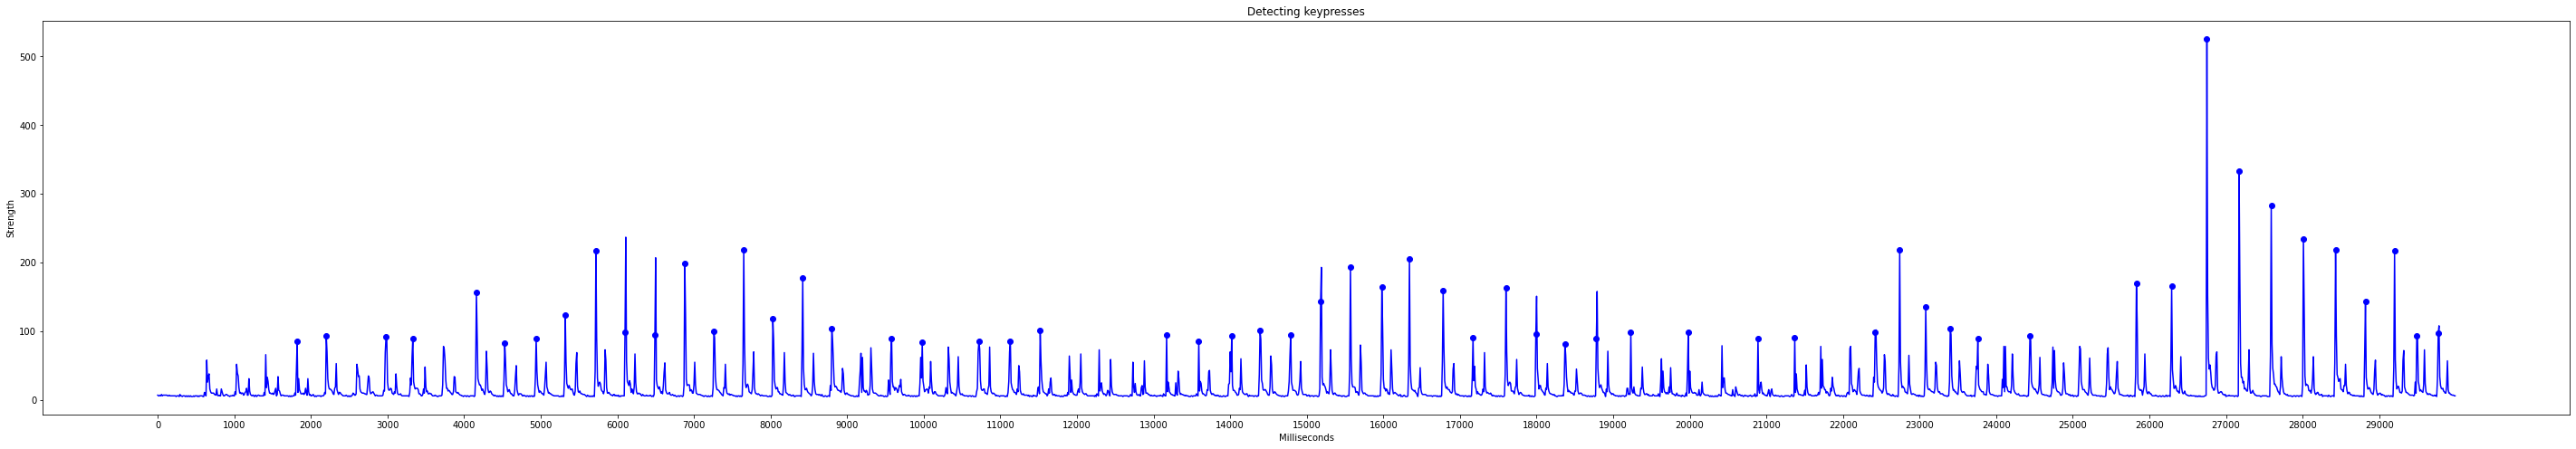

V:


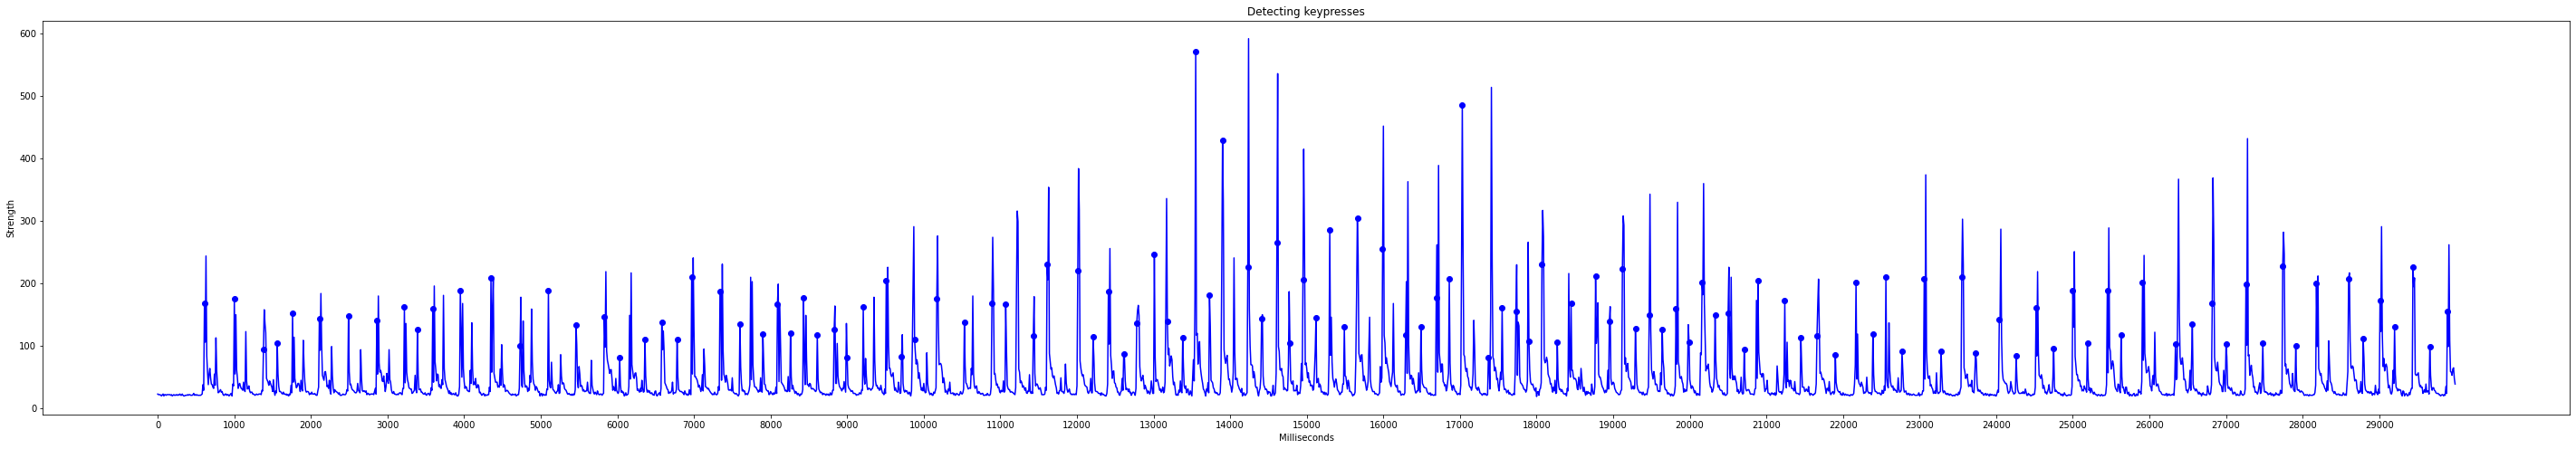

W:


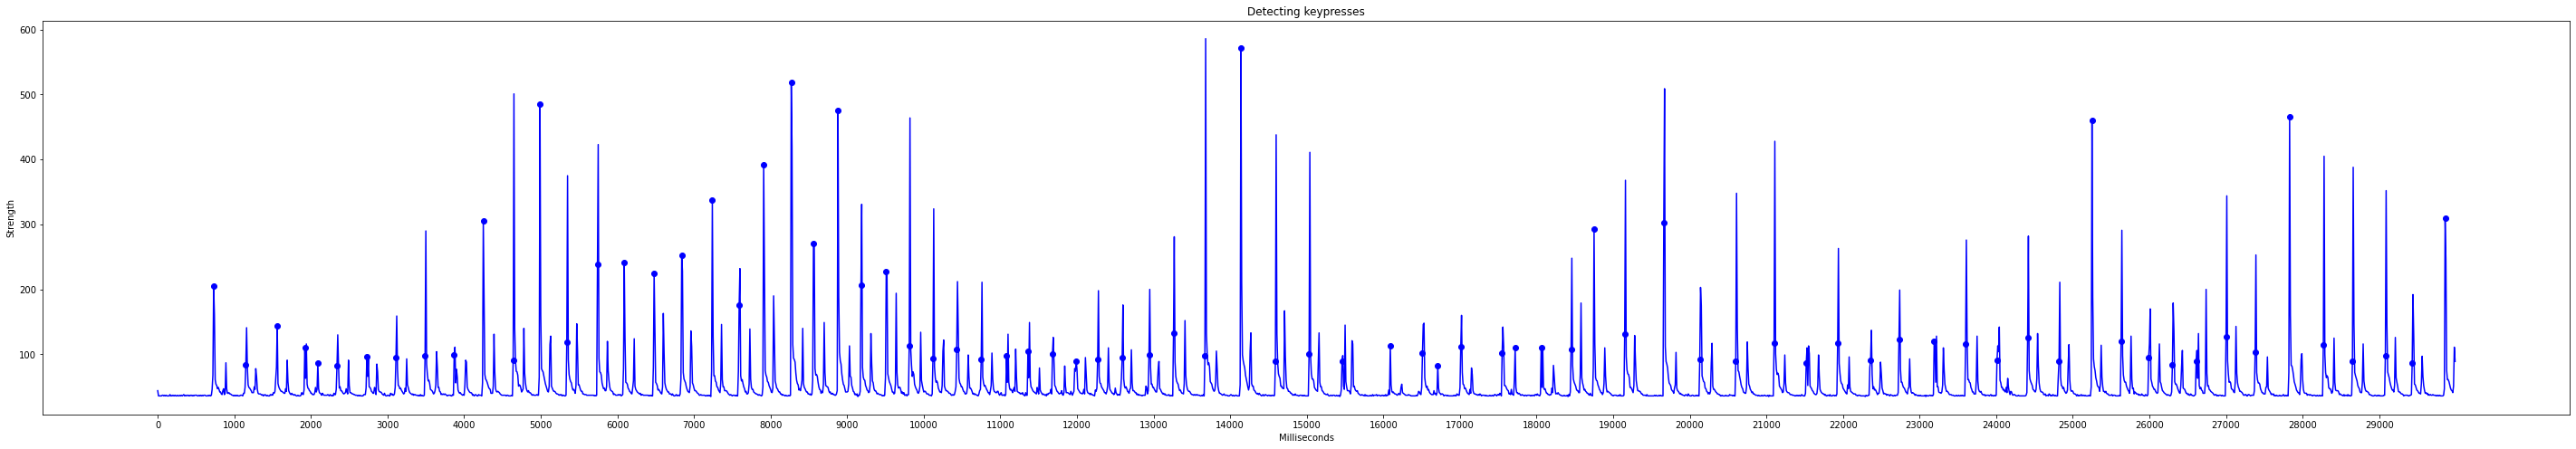

X:


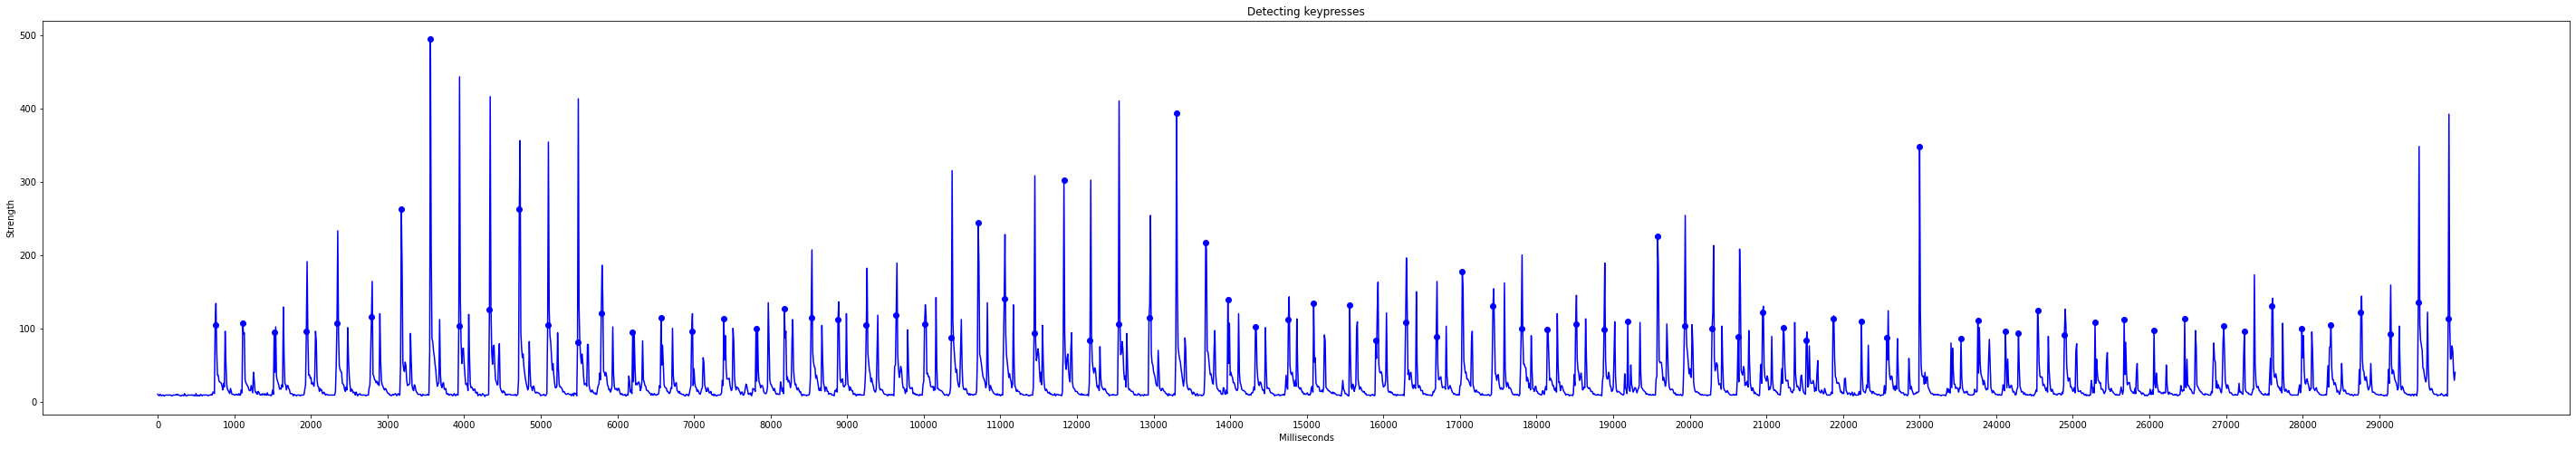

Y:


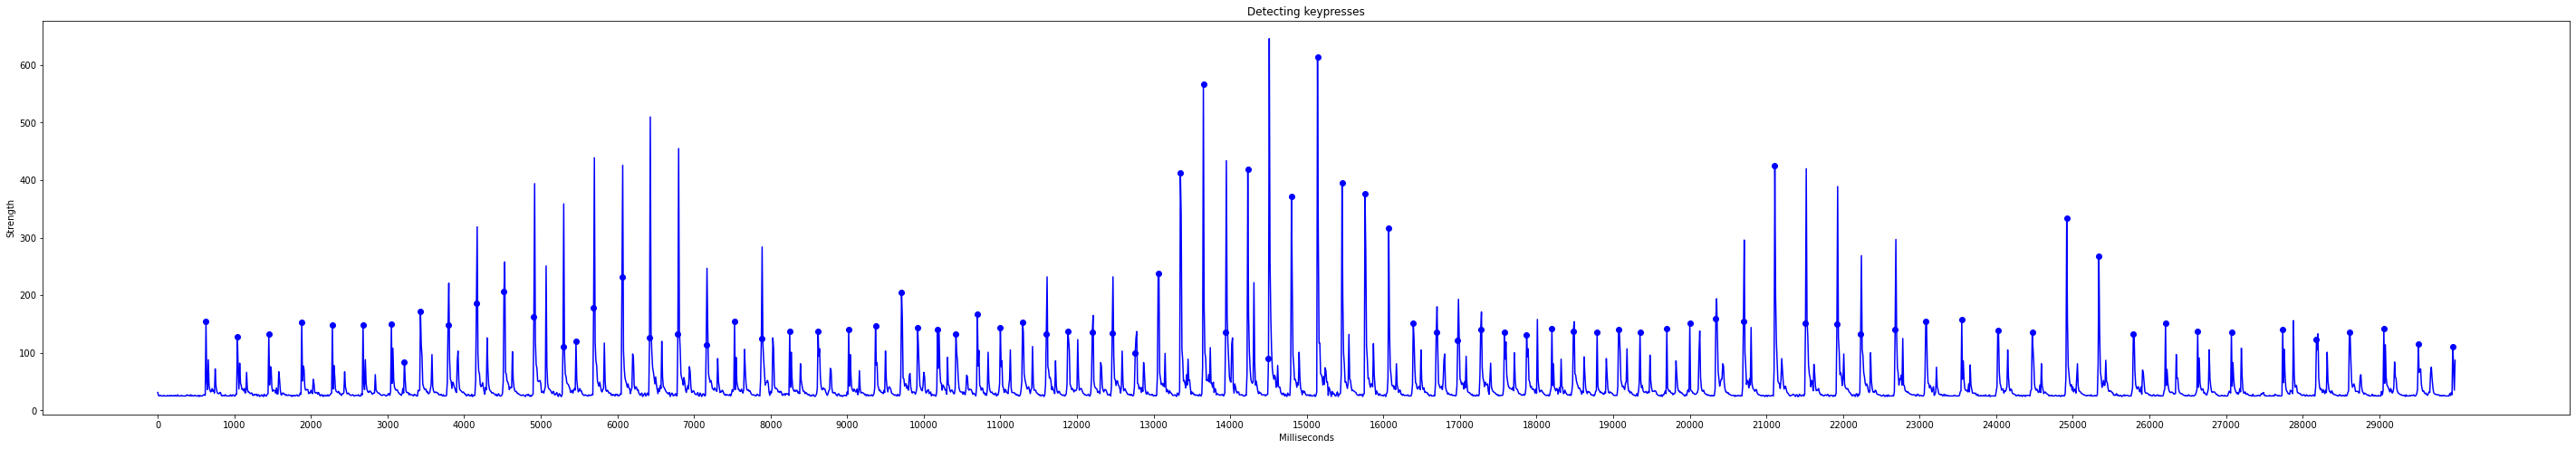

Z:


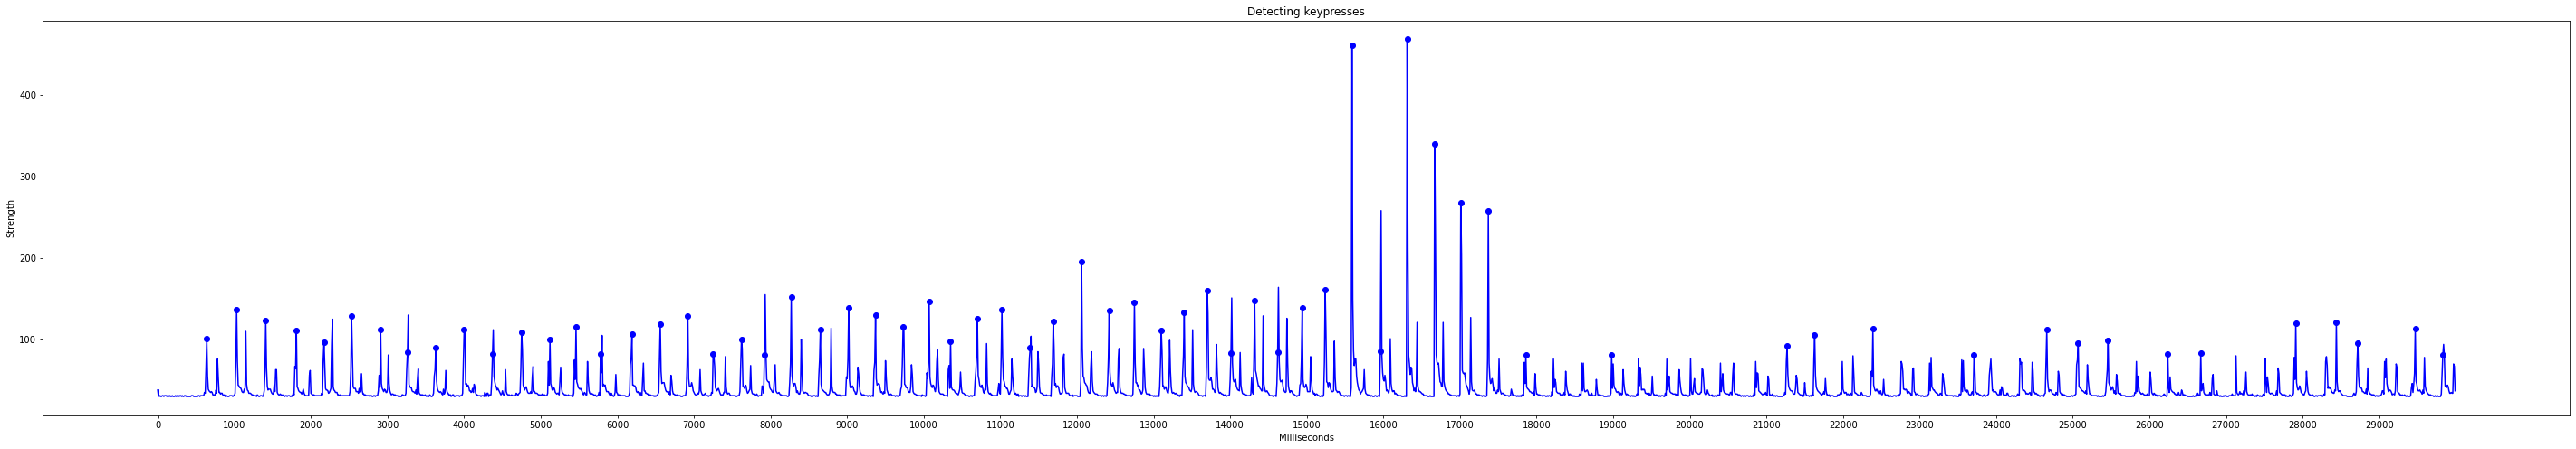

In [97]:
threshold = 80
waitAfter = 150

save_data(DATASET_PATH, TRAIN_JSON_PATH, threshold, waitAfter)

In [60]:
model = build_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 4, 11, 128)        1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 6, 128)        0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 2, 6, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 5, 128)         65664     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 3, 128)        0         
 g2D)                                                            
                                                      

Epoch 45/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.9383 - val_loss: 0.2393 - val_accuracy: 0.9577
Epoch 46/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.9436 - val_loss: 0.2217 - val_accuracy: 0.9648
Epoch 47/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.9377 - val_loss: 0.2124 - val_accuracy: 0.9577
Epoch 48/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.9465 - val_loss: 0.2073 - val_accuracy: 0.9648
Epoch 49/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9559 - val_loss: 0.2126 - val_accuracy: 0.9648
Epoch 50/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9492


Accuracy on test set is: 0.9492242336273193


In [106]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import time
from IPython.display import clear_output

freq = 44100
duration = 10

print("Type something to test AI")
print('Get ready!')
time.sleep(2)
for x in range(3):
    print(str(3 - x), end = ' ')
    time.sleep(2)
print("TYPE!")
recording = sd.rec(int(duration * freq), samplerate=freq, channels=2)
sd.wait()
clear_output(wait=True)

wv.write("Prediction-Audio/test.wav", recording, freq, sampwidth=2)

Type something to test AI
Get ready!
3 2 1 TYPE!


In [102]:
model = build_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 4, 11, 64)         640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 6, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 2, 6, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 5, 64)          16448     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 3, 64)         0         
 g2D)                                                            
                                                     

Epoch 45/50
61/61 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.8545 - val_loss: 0.4143 - val_accuracy: 0.9046
Epoch 46/50
61/61 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.8534 - val_loss: 0.4175 - val_accuracy: 0.9046
Epoch 47/50
61/61 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.8591 - val_loss: 0.4017 - val_accuracy: 0.9066
Epoch 48/50
61/61 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.8747 - val_loss: 0.3948 - val_accuracy: 0.9066
Epoch 49/50
61/61 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.8784 - val_loss: 0.3865 - val_accuracy: 0.9129
Epoch 50/50
26/26 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.9228


Accuracy on test set is: 0.9227895140647888


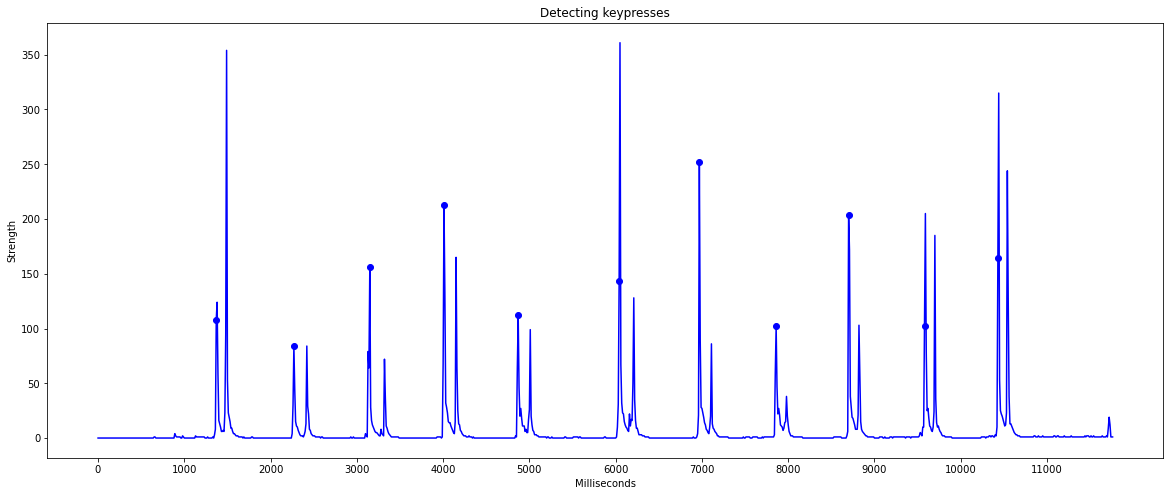

predicted mapping 
[['1' 'O' '6']
 ['1' '2' '8']
 ['J' '2' 'M']
 ['0' 'O' '6']
 ['O' '5' '6']
 ['S' 'N' '1']
 ['O' '1' '6']
 ['O' '6' '5']
 ['5' '6' 'M']
 ['1' '6' 'M']
 ['2' 'M' '6']]


In [118]:
threshold = 80
waitAfter = 200

tmp = save_data_to_predict("Prediction-Audio\\hello-world.wav", PREDICT_JSON_PATH, threshold, waitAfter)
#tmp = save_data_to_predict("Training-Audio\\Shift.wav", PREDICT_JSON_PATH, threshold, waitAfter)
data = np.array(tmp["mfcc"])
data = data[..., np.newaxis]
mapping = load_mapping_for_predict(TRAIN_JSON_PATH)

#Make predictions
predictions = model.predict(data)
best_3 = np.argsort(predictions, axis=1)[:,-3:]

print("predicted mapping \n{}". format(mapping[best_3]))

<h1>Methods:</h1>

<h2>Getting sum of FFT of a single 10ms segment:</h2>

In [3]:
def fftAndSum(signal):
    
    #Transform waveform into frequency domain using fast Fourier transform
    X = np.fft.fft(signal)
    
    #Get 'loudness' of the 10 ms interval
    X_mag = np.absolute(X)
    sum_of_fft = sum(X_mag)
    return sum_of_fft

<h2>Looping through 10ms segments and getting FFT sums and detecting keypresses:</h2>

In [98]:
def detect_touch_peaks(signal, sr, threshold, waitAfter):
    
    # splitting sound into 10 ms chunks
    soundLength = len(signal) / sr # length in seconds
    howManyParts = soundLength * 100 # how many chunks to cut up into
    tenMsParts = np.array_split(signal, howManyParts) # create new array containing 10ms parts
    
    currentTime = 0
    energyArray = []
    detectedClicks = []
    detectedClicksVisualize = [] #Used for plotting FFTs
    ArrayOfMss = []
    passedFirstPeak = False
    detectedKeyPressTime = 0

    for oneSegment in tenMsParts:
        
        ArrayOfMss.append(currentTime) # append current time
        sum_of_fft = round(fftAndSum(oneSegment)) # call fftAndSum and store returned value
        energyArray.append(sum_of_fft)

        #sum_of_fft > (Threshold) which is considered as a peak
        if(sum_of_fft > threshold and not(passedFirstPeak)):
            
            #passedFirstPeak bool is used to skip over the button's release peak when detected the touch peak
            passedFirstPeak = True
            detectedKeyPressTime = currentTime
            
            detectedClicks.append(currentTime) # add time of detected click
            detectedClicksVisualize.append(int(currentTime/10))
            
        elif(currentTime - detectedKeyPressTime > waitAfter): # wait x milliseconds after first peak
            passedFirstPeak = False
            
        currentTime += 10
        
    plt.figure(figsize=(20, 8))
    plt.plot(ArrayOfMss, energyArray, '-bo', markevery = detectedClicksVisualize) # create plot with markers at detected click
    plt.xlabel('Milliseconds')
    plt.xticks(np.arange(0, max(ArrayOfMss),1000))
    plt.ylabel('Strength')
    plt.title('Detecting keypresses')

    plt.show() # display plot
    return detectedClicks

<h2>Saving data to JSON for training:</h2>

In [5]:
def save_data(dataset_path, json_path, threshold, waitAfter, n_mfcc=13, n_fft=2048, hop_length=512):
    #dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    #number of mfcc vectors per segment is supposed to be an integer number
    #'0.12' is 120 ms transformed into seconds. 
    #data vectors for the AI are considered on touchPeak-20ms to touchPeak=100ms - 120ms time window
    
    expeceted_number_of_mfcc_vectors_per_segment = math.ceil((SAMPLE_RATE * 0.12)/hop_length)
    
    #Loop through all audio files
    for root, dirnames, filenames in os.walk(DATASET_PATH):         
        
        #i is to label each click in a file with a label (e.g. recording: a a a a a, these all then labeled 0 0 0 0 0)
        for i, (f) in enumerate(filenames):
            
            #Load audio files
            file_path = os.path.join(root, f)
            signal, sr = librosa.load(file_path)
            
            #Label data with semantic labels (mappings)
            semantic_label = f.removesuffix(".wav")
            data["mapping"].append(semantic_label)
            
            print(semantic_label + ":")
            #Find the touch peaks in the audio file
            touch_peaks = detect_touch_peaks(signal, sr, threshold, waitAfter)
            
            for peak in touch_peaks:
                
                #Start sample is calculated to start 20ms before the detected touch peak
                #peak(ms)-20(ms) is devided by 1000, to get the time our start_sample started in seconds, not ms
                #time when the sample started * sampleRate gives which sample it is (e.g. 501th sample in waveform)
                start_sample = int(sr * (peak-20)/1000)
                end_sample = int(sr * (peak+100)/1000)
                

                #Extract MFCC features from the signal, but only from the touch peaks (start_sample:finish_sample)
                mfcc = librosa.feature.mfcc(signal[start_sample:end_sample],
                                           sr=sr,
                                           n_fft=n_fft,
                                           n_mfcc=n_mfcc,
                                           hop_length=hop_length)
                #Transpose mfcc
                mfcc = mfcc.T
                
                #store mfcc for segment if it has the expected length
                if(len(mfcc) == expeceted_number_of_mfcc_vectors_per_segment):
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i)

    #write data into a json file                
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

<h2>Saving data to JSON for prediction:</h2>

In [6]:
def save_data_to_predict(predict_dataset_file_path, predict_json_path, threshold, waitAfter, n_mfcc=13, n_fft=2048, hop_length=512):
    #dictionary to store data
    predict_data = {
        "mfcc": [],
    }
    #number of mfcc vectors per segment is supposed to be an integer number
    expeceted_number_of_mfcc_vectors_per_segment = math.ceil((SAMPLE_RATE * 0.12)/hop_length)
    

    #Load audio file
    signal, sr = librosa.load(predict_dataset_file_path)


    #Find the touch peaks in the audio file
    touch_peaks = detect_touch_peaks(signal, sr, threshold, waitAfter)
    
    for peak in touch_peaks:

        #Start sample is calculated to start 20ms before the detected touch peak
        #peak(ms)-20(ms) is devided by 1000, to get the time our start_sample started in seconds, not ms
        #time when the sample started * sampleRate gives which sample it is (e.g. 501th sample in waveform)
        start_sample = int(sr * (peak-20)/1000)
        end_sample = int(sr * (peak+100)/1000)


        #Extract MFCC features from the signal, but only from the touch peaks (start_sample:finish_sample)
        mfcc = librosa.feature.mfcc(signal[start_sample:end_sample],
                                   sr=sr,
                                   n_fft=n_fft,
                                   n_mfcc=n_mfcc,
                                   hop_length=hop_length)
        #Transpose mfcc
        mfcc = mfcc.T

        #store mfcc for segment if it has the expected length
        if(len(mfcc) == expeceted_number_of_mfcc_vectors_per_segment):
            predict_data["mfcc"].append(mfcc.tolist())

    with open(predict_json_path, "w") as fp:
        json.dump(predict_data, fp, indent=4)
    return predict_data

<h2>Loading data for training:</h2>

In [7]:
def load_data(json_dataset_path):
    with open(json_dataset_path, "r") as fp:
        data = json.load(fp)
        
    #Convert lists into np arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

<h2>Loading the mappings for prediction:</h2>

In [8]:
def load_mapping_for_predict(JSON_PATH):
    with open(JSON_PATH, "r") as jp:
        data_for_maping = json.load(jp)
    mapping = np.array(data_for_maping["mapping"])
    return mapping

In [9]:
def prepare_datasets(test_size, validation_size):
    
    #Load data
    inputs, targets = load_data(TRAIN_JSON_PATH)
    
    #Create train/test arrays
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=test_size)
    
    #Create train/validation split
    inputs_train, inputs_validation, targets_train, targets_validation = train_test_split(inputs_train, 
                                                                                          targets_train, 
                                                                                          test_size=validation_size)
    
    #to use data for a CNN we need to convert arrays into 3d arrays to imitate being an image
    inputs_train=inputs_train[..., np.newaxis] # 4d array
    inputs_validation=inputs_validation[..., np.newaxis]
    inputs_test=inputs_test[..., np.newaxis]

    return inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test

In [64]:
def build_model():
    
    inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test = prepare_datasets(0.25, 0.2)
    input_shape = (inputs_train.shape[1], inputs_train.shape[2], inputs_train.shape[3])
    
    #Create model
    model = keras.Sequential()
    
    #1st conv layer         kernals  grid_size
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #2nd conv layer
    model.add(keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #3rd conv layer
    #model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=input_shape))
    #model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
    #model.add(keras.layers.BatchNormalization())
    
    #flatten the output and feed it into dense layer for classification
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) #lessen overfitting
    
    #output layer
    model.add(keras.layers.Dense(42, activation='softmax'))
    
    #Compile CNN
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

    model.summary()
    
    #Train CNN
    model.fit(inputs_train, targets_train, 
              validation_data=(inputs_validation, targets_validation), 
              batch_size=32, 
              epochs=50)
    
    #Evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
    print("\n\nAccuracy on test set is: {}".format(test_accuracy))
    
    
    return model

In [24]:
build_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 4, 11, 64)         640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 6, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 2, 6, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 5, 32)          8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 3, 32)         0         
 2D)                                                             
                                                      

54/54 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.8042 - val_loss: 0.6565 - val_accuracy: 0.8521
Epoch 45/200
54/54 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.7984 - val_loss: 0.6351 - val_accuracy: 0.8545
Epoch 46/200
54/54 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.8219 - val_loss: 0.6115 - val_accuracy: 0.8592
Epoch 47/200
54/54 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.8095 - val_loss: 0.5977 - val_accuracy: 0.8662
Epoch 48/200
54/54 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.8195 - val_loss: 0.5907 - val_accuracy: 0.8685
Epoch 49/200
54/54 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.8136 - val_loss: 0.5877 - val_accuracy: 0.8638
Epoch 50/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.8248 - val_loss: 0.5798 - val_accuracy: 0.8709
Epoch 51/200
54/54 

KeyboardInterrupt: 